In [39]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [40]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Align_press_CoM')
try:
    dens.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Interpart_press')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/BubComp2')
try:
    pres2.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres3 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/PhaseComp2')
try:
    pres3.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
# Grab the MCS data
pres4 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/radial')
try:
    pres4.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    
# Grab the MCS data
pres5 = os.listdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/lat')
try:
    pres5.remove('.DS_Store')
except:
    print(".DS_Store not in directory")    
    

/Users/nicklauersdorf/hoomd-blue/build/njlauersdorf/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory
.DS_Store not in directory


In [41]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [42]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Align_press_CoM')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin,clust_size,press_align,press_alignA,press_alignB
0,0.0,5.016308,28099,1197.337839,0.0,1197.337839
1,0.1,5.016308,28929,1488.390209,0.0,1488.390209
2,0.2,5.016308,29941,1623.780096,0.0,1623.780096
3,0.3,5.016308,30913,1745.489949,0.0,1745.489949
4,0.4,5.016308,31789,1831.510797,0.0,1831.510797
...,...,...,...,...,...,...
1994,199.4,5.016308,26063,1013.931161,0.0,1013.931161
1995,199.5,5.016308,25887,1021.301795,0.0,1021.301795
1996,199.6,5.016308,26207,1022.161780,0.0,1022.161780
1997,199.7,5.016308,26192,1020.173247,0.0,1020.173247


In [43]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,450,50.0,1.0,60.0,0.000001
24,0,250,250,50.0,1.0,60.0,0.000001
25,0,350,450,50.0,1.0,60.0,0.000001
26,0,350,350,50.0,1.0,60.0,0.000001


In [44]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin,clust_size,press_align,press_alignA,press_alignB
0,0.0,5.016308,28099,1197.337839,0.0,1197.337839
1,0.1,5.016308,28929,1488.390209,0.0,1488.390209
2,0.2,5.016308,29941,1623.780096,0.0,1623.780096
3,0.3,5.016308,30913,1745.489949,0.0,1745.489949
4,0.4,5.016308,31789,1831.510797,0.0,1831.510797
...,...,...,...,...,...,...
1994,199.4,5.016308,26063,1013.931161,0.0,1013.931161
1995,199.5,5.016308,25887,1021.301795,0.0,1021.301795
1996,199.6,5.016308,26207,1022.161780,0.0,1022.161780
1997,199.7,5.016308,26192,1020.173247,0.0,1020.173247


5.016308
28099


In [45]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/Interpart_press')
for i in pres:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres[-1])

,Timestep,gasArea,gasSigXX,gasSigXY,gasSigYX,gasSigYY,gasTrace,bulkArea,bulkSigXX,bulkSigXY,bulkSigYX,bulkSigYY,bulkTrace,Length,NDense
0,0.0,38269.802,2930.856,-294.252,-294.252,3341.832,2842.092,24884.897,7.059794e+07,9056.604,9056.604,7.060307e+07,7.060956e+07,515.0,45357
1,0.1,44471.974,77494.510,-2444.160,-2444.160,85790.184,79198.187,18846.575,4.592046e+08,-3137882.107,-3137882.107,4.591064e+08,4.560176e+08,477.9,45683


In [46]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params2 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params2 = params2.append(df, ignore_index = True)
display(params2)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,250,50.0,1.0,60.0,0.000001
24,0,250,350,50.0,1.0,60.0,0.000001
25,0,350,450,50.0,1.0,60.0,0.000001
26,0,350,350,50.0,1.0,60.0,0.000001


In [47]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres)):
    # Ger rid of NaN in favor of 0
    all_pres[i].fillna(0, inplace=True)

headers=list(all_pres[0])
display(all_pres[0])
print(all_pres[0][headers[1]][0])
print(all_pres[0][headers[2]][0])

,Timestep,gasArea,gasSigXX,gasSigXY,gasSigYX,gasSigYY,gasTrace,bulkArea,bulkSigXX,bulkSigXY,bulkSigYX,bulkSigYY,bulkTrace,Length,NDense
0,0.0,44844.129,92316.065,-456.802,-456.802,88362.645,89882.553,18450.287,1.162858e+07,1454.371,1454.371,1.162806e+07,1.162978e+07,489.1,28099
1,0.1,45857.714,1397651.897,8745.932,8745.932,1419559.533,1417351.647,17413.839,2.167519e+07,-24853.220,-24853.220,2.192005e+07,2.177277e+07,500.4,28929
2,0.2,45653.219,1293193.957,-19261.956,-19261.956,1291883.940,1273276.992,17519.262,2.712373e+07,-116010.457,-116010.457,2.735465e+07,2.712318e+07,522.9,29941
3,0.3,45372.514,1150175.593,8319.723,8319.723,1153303.840,1160059.439,17730.108,3.207330e+07,-206595.301,-206595.301,3.236815e+07,3.201413e+07,556.7,30913
4,0.4,45098.161,1038939.876,7485.587,7485.587,1037802.598,1045856.824,17899.039,3.670095e+07,-386406.385,-386406.385,3.668538e+07,3.630676e+07,590.6,31789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,199.5,47994.116,1358566.314,-2450.036,-2450.036,1372793.009,1363229.625,14552.178,2.712346e+07,-175486.731,-175486.731,2.784309e+07,2.730778e+07,725.8,25887
1996,199.6,47281.559,1299652.346,10087.574,10087.574,1298506.750,1309167.122,14477.239,2.709283e+07,-104773.775,-104773.775,2.759999e+07,2.724164e+07,991.8,26207
1997,199.7,47483.514,1295001.420,-5172.023,-5172.023,1293273.514,1288965.444,14590.283,2.707175e+07,80544.832,80544.832,2.738462e+07,2.730873e+07,844.1,26192
1998,199.8,47188.838,1274935.358,-7899.448,-7899.448,1260914.551,1260025.507,14672.843,2.729809e+07,316871.268,316871.268,2.722713e+07,2.757948e+07,953.5,26407


44844.129
92316.065


In [48]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/BubComp2')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,45357,1,1,7942,20742,93.612591,1.803694,607.132049,396.498974,35.559082,3.525594,58.053509,93.612591,799


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 200.0, 350.0, 450.0, 250.0, 350.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [49]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,250,50.0,1.0,60.0,0.000001
24,0,250,350,50.0,1.0,60.0,0.000001
25,0,350,350,50.0,1.0,60.0,0.000001
26,0,350,450,50.0,1.0,60.0,0.000001


In [50]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,edge_begin,edge_end,NBin
0,0.0,5.016308,28099,2,2,9027,5785,86.218605,2.551449,566.002157,418.600835,23.901379,4.373878,62.317226,86.218605,567
1,0.1,5.016308,28929,1,1,7852,5657,84.067983,2.676787,596.115110,403.342331,21.517395,2.760762,62.550588,84.067983,524
2,0.2,5.016308,29941,1,1,7579,7363,88.756423,3.102743,617.403904,399.559683,26.929242,3.239495,61.827182,88.756423,638
3,0.3,5.016308,30913,1,1,7021,8289,88.878930,5.133081,633.238223,399.668279,27.042091,5.420300,61.836839,88.878930,641
4,0.4,5.016308,31789,1,1,6391,8626,86.769166,5.375895,634.991305,403.383937,24.482083,5.756743,62.287083,86.769166,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,199.4,5.016308,26063,2,3,42,66,3.752094,1.404111,35.085886,0.000000,0.000000,0.000000,0.000000,0.000000,10
3046,199.5,5.016308,25887,2,2,2914,11525,75.962884,8.133624,549.784054,372.148288,22.821240,12.627990,53.290843,75.962884,482
3047,199.6,5.016308,26207,1,1,2728,11253,74.939718,6.961902,524.270605,366.977504,21.727100,11.687968,53.308468,74.939718,457
3048,199.7,5.016308,26192,1,1,2734,11217,75.352481,7.165606,523.211632,372.679724,21.496875,5.240507,53.855606,75.352481,457


5.016308
28099


In [51]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres3:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres3, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new2 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/PhaseComp2')
for i in pres3:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new2.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new2[-1])
print(storeVals)

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,45357,17031,0,373,0,4285,1429,7942,20742,799,0,0,0


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 100.0, 150.0, 200.0, 250.0, 150.0, 200.0, 250.0, 350.0, 450.0, 200.0, 350.0, 450.0, 250.0, 350.0, 450.0, 450.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [52]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params4 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params4 = params4.append(df, ignore_index = True)
display(params4)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,350,50.0,1.0,60.0,0.000001
24,0,250,450,50.0,1.0,60.0,0.000001
25,0,350,450,50.0,1.0,60.0,0.000001
26,0,350,350,50.0,1.0,60.0,0.000001


In [53]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new2)):
    # Ger rid of NaN in favor of 0
    all_pres_new2[i].fillna(0, inplace=True)

headers=list(all_pres_new2[0])
display(all_pres_new2[0])
print(all_pres_new2[0][headers[1]][0])
print(all_pres_new2[0][headers[2]][0])

,tauB,sizeBin,clust_size,Na_bulk,Nb_bulk,NBin_bulk,Na_gas,Nb_gas,NBin_gas,Na_int,Nb_int,NBin_int,Na_bub,Nb_bub,NBin_bub
0,0.0,5.016308,28099,15946,0,434,0,19242,1600,9027,5785,567,0,0,0
1,0.1,5.016308,28929,17121,0,442,0,19370,1635,7852,5657,524,0,0,0
2,0.2,5.016308,29941,17394,0,431,0,17664,1532,7579,7363,638,0,0,0
3,0.3,5.016308,30913,17952,0,431,0,16738,1529,7021,8289,641,0,0,0
4,0.4,5.016308,31789,18582,0,437,0,16401,1589,6391,8626,575,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,199.4,5.016308,26063,11205,1221,292,10380,11703,1763,3146,11838,503,242,265,43
1995,199.5,5.016308,25887,11414,1437,302,10645,12065,1817,2914,11525,482,0,0,0
1996,199.6,5.016308,26207,11473,1563,307,10772,12211,1837,2728,11253,457,0,0,0
1997,199.7,5.016308,26192,11528,1745,313,10711,12065,1831,2734,11217,457,0,0,0


5.016308
28099


In [54]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres4:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres4, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new3 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/radial')
for i in pres4:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new3.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new3[-1])
print(storeVals)

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,2,1,0,0.000000,3.045615,-0.109905,-0.109905,NaN,1.887395,1.887395,0.000000,-93.345707,-93.345707,0.000000
1,0.0,5.016308,2,1,0,3.045615,6.091230,-0.019819,-0.019819,NaN,1.784446,1.784446,0.000000,-15.914660,-15.914660,0.000000
2,0.0,5.016308,2,1,0,6.091230,9.136846,-0.015530,-0.015530,NaN,1.811899,1.811899,0.000000,-12.662423,-12.662423,0.000000
3,0.0,5.016308,2,1,0,9.136846,12.182461,0.027265,0.027265,NaN,1.823665,1.823665,0.000000,22.375181,22.375181,0.000000
4,0.0,5.016308,2,1,0,12.182461,15.228076,-0.016079,-0.016079,NaN,1.738691,1.738691,0.000000,-12.580196,-12.580196,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.0,5.016308,2,1,0,112.687764,115.733379,-0.040714,NaN,-0.040714,0.115760,0.000000,0.115760,-2.120886,0.000000,-2.120886
38,0.0,5.016308,2,1,0,115.733379,118.778994,-0.074834,NaN,-0.074834,0.128352,0.000000,0.128352,-4.322281,0.000000,-4.322281
39,0.0,5.016308,2,1,0,118.778994,121.824610,0.070742,NaN,0.070742,0.105989,0.000000,0.105989,3.374043,0.000000,3.374043
40,0.0,5.016308,2,1,0,121.824610,124.870225,0.018141,NaN,0.018141,0.105914,0.000000,0.105914,0.864622,0.000000,0.864622


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 450.0, 350.0, 200.0, 450.0, 250.0, 350.0, 350.0, 450.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [55]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params5 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new3)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params5 = params5.append(df, ignore_index = True)
display(params5)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,250,50.0,1.0,60.0,0.000001
24,0,250,350,50.0,1.0,60.0,0.000001
25,0,350,350,50.0,1.0,60.0,0.000001
26,0,350,450,50.0,1.0,60.0,0.000001


In [56]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new3)):
    # Ger rid of NaN in favor of 0
    all_pres_new3[i].fillna(0, inplace=True)

headers=list(all_pres_new3[0])
display(all_pres_new3[0])
print(all_pres_new3[0][headers[1]][0])
print(all_pres_new3[0][headers[2]][0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,alignA,alignB,num_dens,num_densA,num_densB,press,pressA,pressB
0,0.0,5.016308,4,2,0,0.000000,3.045615,-0.187748,-0.187748,0.000000,1.338334,1.338334,0.000000,0.000000,0.0,0.000000
1,0.0,5.016308,4,2,0,3.045615,6.091230,0.106669,0.106669,0.000000,1.429845,1.429845,0.000000,0.000000,0.0,0.000000
2,0.0,5.016308,4,2,0,6.091230,9.136846,-0.001591,-0.001591,0.000000,1.475600,1.475600,0.000000,0.000000,0.0,0.000000
3,0.0,5.016308,4,2,0,9.136846,12.182461,-0.036186,-0.036186,0.000000,1.455990,1.455990,0.000000,0.000000,0.0,0.000000
4,0.0,5.016308,4,2,0,12.182461,15.228076,-0.016714,-0.016714,0.000000,1.487038,1.487038,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83953,199.8,5.016308,75,3,0,112.687764,115.733379,0.045804,0.071351,0.020731,0.489579,0.242502,0.247077,1.024447,0.0,1.024447
83954,199.8,5.016308,75,3,0,115.733379,118.778994,0.012749,0.004306,0.020042,0.505831,0.234420,0.271410,1.087897,0.0,1.087897
83955,199.8,5.016308,75,3,0,118.778994,121.824610,0.036924,0.034478,0.039021,0.504319,0.232829,0.271489,2.118783,0.0,2.118783
83956,199.8,5.016308,75,3,0,121.824610,124.870225,0.002864,-0.002821,0.007747,0.518981,0.239790,0.279190,0.432588,0.0,0.432588


5.016308
4


In [57]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres5:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres5, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new4 = []
os.chdir(parent)
os.chdir('../../../../../../../../Volumes/External/txt_files/fast_out_txt_files/lat')
for i in pres5:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new4.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new4[-1])
print(storeVals)

,tauB,sizeBin,clust_size,lat_mean_bulk,lat_mean_int,lat_mean_bub,lat_mean_all,lat_std_bulk,lat_std_int,lat_std_bub,lat_std_all
0,0.0,5.016308,44897,0.806957,0.859502,0.807152,0.841945,0.002411,0.218720,0.00237,0.180177
1,0.1,5.016308,45274,0.687771,0.751325,0.000000,0.726287,0.003277,0.222893,0.00000,0.176287
2,0.2,5.016308,45817,0.695007,0.766929,0.000000,0.738462,0.002713,0.225908,0.00000,0.179094
3,0.3,5.016308,46135,0.706322,0.776443,0.000000,0.748811,0.002828,0.222933,0.00000,0.176895
4,0.4,5.016308,46112,0.717505,0.789858,0.000000,0.759524,0.003279,0.222645,0.00000,0.173400
...,...,...,...,...,...,...,...,...,...,...,...
1994,199.4,5.016308,42768,0.768898,0.864989,0.000000,0.810407,0.010587,0.269704,0.00000,0.183716
1995,199.5,5.016308,42921,0.769052,0.868694,0.000000,0.811646,0.011109,0.280111,0.00000,0.189844
1996,199.6,5.016308,43002,0.770455,0.861842,0.000000,0.810173,0.011416,0.262990,0.00000,0.179404
1997,199.7,5.016308,42984,0.771013,0.864707,0.000000,0.813785,0.011461,0.267241,0.00000,0.186687


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0], [200.0, 250.0, 350.0, 450.0, 450.0, 150.0, 200.0, 250.0, 350.0, 100.0, 150.0, 200.0, 250.0, 450.0, 150.0, 200.0, 250.0, 350.0, 450.0, 450.0, 350.0, 200.0, 450.0, 250.0, 350.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [58]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params6 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new4)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params6 = params6.append(df, ignore_index = True)
display(params6)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,200,50.0,1.0,60.0,0.000001
1,0,0,250,50.0,1.0,60.0,0.000001
2,0,0,350,50.0,1.0,60.0,0.000001
3,0,0,450,50.0,1.0,60.0,0.000001
4,0,50,450,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
22,0,250,450,50.0,1.0,60.0,0.000001
23,0,250,250,50.0,1.0,60.0,0.000001
24,0,250,350,50.0,1.0,60.0,0.000001
25,0,350,350,50.0,1.0,60.0,0.000001


In [59]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new4)):
    # Ger rid of NaN in favor of 0
    all_pres_new4[i].fillna(0, inplace=True)

headers=list(all_pres_new4[0])
display(all_pres_new4[0])
print(all_pres_new4[0][headers[1]][0])
print(all_pres_new4[0][headers[2]][0])

,tauB,sizeBin,clust_size,lat_mean_bulk,lat_mean_int,lat_mean_bub,lat_mean_all,lat_std_bulk,lat_std_int,lat_std_bub,lat_std_all
0,0.0,5.016308,28099,0.888711,1.033403,0.000000,0.958390,0.004839,0.259691,0.000000,0.194205
1,0.1,5.016308,28929,0.865916,0.978652,0.000000,0.915637,0.014162,0.330030,0.000000,0.226458
2,0.2,5.016308,29941,0.848055,1.010342,0.000000,0.923045,0.010822,0.372984,0.000000,0.266258
3,0.3,5.016308,30913,0.835109,1.004637,0.000000,0.913140,0.007164,0.371285,0.000000,0.265742
4,0.4,5.016308,31789,0.826279,0.973256,0.000000,0.891970,0.005169,0.337018,0.000000,0.236896
...,...,...,...,...,...,...,...,...,...,...,...
1994,199.4,5.016308,26063,0.826452,0.949344,1.479685,0.904276,0.008769,0.231942,0.274467,0.200190
1995,199.5,5.016308,25887,0.827092,0.948735,0.000000,0.891453,0.008870,0.231908,0.000000,0.179385
1996,199.6,5.016308,26207,0.827809,0.941057,0.000000,0.886414,0.008929,0.221834,0.000000,0.169430
1997,199.7,5.016308,26192,0.828334,0.943768,0.000000,0.887489,0.009602,0.223031,0.000000,0.169897


5.016308
28099


In [60]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [61]:
#Constants
kT = 1.0                        # temperature
threeEtaPiSigma = 1.0           # drag coefficient
sigma = 1.0                     # particle diameter
D_t = kT / threeEtaPiSigma      # translational diffusion constant
D_r = (3.0 * D_t) / (sigma**2)  # rotational diffusion constant
tauBrown = (sigma**2) / D_t     # brownian time scale (invariant)



def compPeNet(xf, pes, pef):
    "Given each species activity (pes and pef) and particle fraction (xf), compute net activity (peNet)"
    peNet = (pes * (1.-xf)) + (pef * xf)
    return peNet
def avgCollisionForce(peNet):
    '''Computed from the integral of possible angles'''
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
    return (magnitude * peNet) / (np.pi)  
def ljForce(r, eps, sigma=1.):
    '''Compute the Lennard-Jones force'''
    div = (sigma/r)
    dU = (24. * eps / r) * ((2*(div**12)) - (div)**6)
    return dU

# Lennard-Jones pressure
def ljPress(r, pe, eps, sigma=1.):
    '''
    Purpose: Take epsilon (magnitude of lennard-jones force), sigma (particle diameter),
    activity (pe), and separation distance (r) of 2 particles to compute pressure from
    avg compressive active forces from neighbors
    
    Inputs: 
        r: Separation distance in simulation units
        epsilon: magnitude of lennard-jones potential
        pe: activity (peclet number)
        sigma: particle diameter (default=1.0)
    
    Output: Analytical virial pressure (see monodisperse paper for derivation)
    '''
    #Area fraction at HCP
    phiCP = np.pi / (2. * np.sqrt(3.))
    
    # LJ force
    ljF = avgCollisionForce(pe)
    
    return (2. *np.sqrt(3) * ljF / r)

def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

#Calculate gas phase area fraction
def compPhiG(pe, a, kap=4.5, sig=1.):
    '''
    Purpose: Compute analytical area fraction of the gas phase at steady state
    given activity and lattice spacing
    
    Inputs: 
        pe: net activity (peclet number)
        a: lattice spacing 
        kap: fitting parameter (default=4.5, shown by Redner)
        sig: particle diameter (default=1.0)
    
    Output: Area fraction of the gas phase at steady state
    '''
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    if den>0:
        return num / den
    else:
        return 0
# Calculate dense phase area fraction from lattice spacing
def latToPhi(latIn):
    '''
    Purpose: Compute analytical area fraction of the dense phase given the lattice
    spacing.
    
    Inputs: 
        latIn: lattice spacing
    
    Output: dense phase area fraction
    '''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)
def areaType(Nx, latx):
    Ax = Nx * np.pi * 0.25 * (latx**2)
    return Ax

#Slow activities interested in
pe_a = [0, 100, 150, 200, 250, 350, 450]
#Fast activities interested in
pe_b = [0, 100, 150, 200, 250, 350, 450]

#Particle fraction of slow activities
xA = 50./100.0

#Particle fraction of fast activities
xF = 50./100.0

#Particle fraction of slow activities
xS=1.0-xF

partNum = 50000          # total number of particles
partNumS=xS*partNum      # total number of slow particles
partNumF=xF*partNum      # total number of fast particles

intPhi = 60               # integer system area fraction
phi = float(intPhi)/100.0 # system area fraction
eps = 1.0                 # particle softness

#initialize empty arrays for appending to
press_fast_int = np.array([])
press_slow_int = np.array([])
press_fast_dense = np.array([])
press_slow_dense = np.array([])
pa_pair = np.array([])
pb_pair = np.array([])
pnet_pair = np.array([])
int_width_slow = np.array([])
int_width_fast = np.array([])
int_width_theory = np.array([])
int_width_predict_fastd = np.array([])
int_width_predict_slowd = np.array([])
int_width_fast_int_arr = np.array([])
int_width_slow_int_arr = np.array([])
#Loop over slow activities
for i in range(0, len(pe_a)): 
    
    #Loop over fast activities
    for j in range(0, len(pe_b)):
        
        #Be sure slow activity is less than or equal to fast activity
        if pe_a[i]<=pe_b[j]:
            
            #Compute net activity
            peNet = compPeNet(xF, pe_a[i], pe_b[j])
            
            # Compute lattice spacing based on each activity
            latS = getLat(pe_a[i], eps)
            latF = getLat(pe_b[j], eps)
            latNet = getLat(peNet, eps)
            
            Ns = partNum * (1. - xF)          # number of slow particles
            Nf = partNum - Ns                 # number of fast particles
            
            phiG = compPhiG(peNet, latNet)              # area fraction of gas phase
            NGas = (phiG / phi) * partNum    # number of gas particles
            
            #Compute area fraction of dense phase based on each lattice spacing
            phi_theory = latToPhi(latNet)
            phiS_theory = latToPhi(latS)
            phiF_theory = latToPhi(latF)
            
            #Compute number density of slow and fast particles
            nS_theory = phi_theory /(np.pi/4)
            nF_theory = phi_theory /(np.pi/4)
            
            #Compute number of particles in liquid phase
            Nl = int(round(partNum * ((phi_theory * (phiG - phi)) / (phi * (phiG - phi_theory)))))
            
            #Compute number of particles in gas phase
            NGas = partNum - Nl
            
            # Critical packing fraction in HCP lattice
            phiCP = np.pi / (2. * np.sqrt(3))
            
            # The area is the sum of the particle areas (normalized by close packing density of spheres)
            Al = (Nl * np.pi * (latNet)**2) / (4*phiCP)
            As = (Ns * np.pi * (latNet)**2) / (4*phiCP)
            if As > Al:
                As = Al
            Af = (Nf * np.pi * (latNet)**2) / (4*phiCP)
            if Af > Al:
                Af = Al
            
            # The area for instantiated liquid cluster
            Al_real=Al
            
            # The cluster radius is the square root of liquid area divided by pi
            Rl = np.sqrt(Al_real / np.pi)
            Rs = np.sqrt(As / np.pi)
            Rf = np.sqrt(Af / np.pi)
            
            #The interface width is the difference between the 100% bulk species radius and the total cluster radius
            int_width_fast_int = Rl-Rs
            int_width_slow_int = Rl-Rf
            int_width_fast_int_arr = np.append(int_width_fast_int_arr, int_width_fast_int)
            int_width_slow_int_arr = np.append(int_width_slow_int_arr, int_width_slow_int)
            #Calculate interface aligned active pressure from theory
            press_fast_int = np.append(press_fast_int, int_width_fast_int * nF_theory * 1.0 * pe_b[j])
            press_slow_int = np.append(press_slow_int, int_width_slow_int * nS_theory * 1.0 * pe_a[i])
            
            #Calculate bulk interparticle pressure from theory
            press_slow_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            press_fast_dense_val = 4.0 * np.sqrt(3) * peNet / latNet
            
            #Append pressures to array
            press_slow_dense = np.append(press_slow_dense, press_slow_dense_val)
            press_fast_dense = np.append(press_fast_dense, press_fast_dense_val)
            int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
            int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
            
            #Append activities to array
            pa_pair = np.append(pa_pair, pe_a[i])
            pb_pair = np.append(pb_pair, pe_b[j])
            pnet_pair = np.append(pnet_pair, pe_b[j]*0.5 + pe_a[i]*0.5)
            
            #Append interface widths to array
            int_width_fast = np.append(int_width_fast, int_width_fast_int)
            int_width_slow = np.append(int_width_slow, int_width_slow_int)
            
            #Calculate dense phase pressure again and constants for predicting what interface width is for balancing pressure
            curPLJ = ljPress(latNet, peNet, eps)

            alpha_max = 0.5
            I_arr = 3.0
            int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
            int_width_theory = np.append(int_width_theory, int_width)

<ipython-input-61-0d8571e0afad>:214: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_slowd = np.append(int_width_predict_slowd, press_slow_dense_val/(pe_b[j]*nF_theory))
<ipython-input-61-0d8571e0afad>:215: RuntimeWarning: invalid value encountered in double_scalars
  int_width_predict_fastd = np.append(int_width_predict_fastd, press_fast_dense_val/(pe_a[i]*nS_theory))
<ipython-input-61-0d8571e0afad>:231: RuntimeWarning: invalid value encountered in double_scalars
  int_width = (np.sqrt(3)/(2*alpha_max)) * (curPLJ/peNet) * (latNet **2) * I_arr
<ipython-input-61-0d8571e0afad>:194: RuntimeWarning: invalid value encountered in sqrt
  Rl = np.sqrt(Al_real / np.pi)
<ipython-input-61-0d8571e0afad>:195: RuntimeWarning: invalid value encountered in sqrt
  Rs = np.sqrt(As / np.pi)
<ipython-input-61-0d8571e0afad>:196: RuntimeWarning: invalid value encountered in sqrt
  Rf = np.sqrt(Af / np.pi)
<ipython-input-61-0d8571e0afad>:215: RuntimeWarning: divide by zero enc

In [62]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

In [ ]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
first_align_peNet=np.array([])
first_interpart_peNet=np.array([])
first_interpart_peA=np.array([])
first_interpart_peB=np.array([])

align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])
first_align_press = np.array([])
first_bulk_press = np.array([])
first_align_peA=np.array([])
first_align_peB=np.array([])

interpart_peA=np.array([])
interpart_peB=np.array([])
interpart_peNet=np.array([])
interpart_xA=np.array([])
interpart_eps=np.array([])
interpart_pnum=np.array([])
interpart_phi=np.array([])
interpart_press=np.array([])
interpart_press_expand=np.array([])
avg_shear=np.array([])
fastCol = '#e31a1c'
slowCol = '#081d58'

avg_rad = np.array([])
avg_width = np.array([])
avg_clust = np.array([])

bulk_lat_time_mean = np.array([])
int_lat_time_mean = np.array([])
all_lat_time_mean = np.array([])
bulk_lat_time_std = np.array([])
int_lat_time_std = np.array([])
all_lat_time_std = np.array([])


avg_bulk_nA = np.array([])
avg_bulk_nB = np.array([])
avg_bulk_n = np.array([])
avg_dense_nA = np.array([])
avg_dense_nB = np.array([])
avg_dense_n = np.array([])
avg_int_n = np.array([])
avg_int_nA = np.array([])
avg_int_nB = np.array([])
avg_gas_nA = np.array([])
avg_gas_nB = np.array([])
avg_gas_n = np.array([])

avg_int_theory_arr = np.array([])
avg_bulk_theory_arr = np.array([])
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.874#3.0#1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out
def densProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    gas_dense_dif_phi = 0.866 * np.log10(activity_net - 46.993) - 0.443
    rate_decay = -6.151 * np.log10(activity_net-49.921) - 4.392
    mid_point = 0.044 * np.log10(activity_slow-49.893) + 0.836
    gas_phi = -0.26 * np.log10(activity_slow-41.742)+0.783
    
    num_dens_r = ((gas_dense_dif_phi / (1+np.exp(-rate_decay * (r-mid_point)))) + gas_phi)
    
    return num_dens_r

def alignProbability(r, activity_net, activity_slow):
    "Using similar triangles to find sides"
    max_align = 0.2019 * np.log10(activity_net - 41.2803) - 0.1885
    mid_point = 0.0492 * np.log10(activity_slow - 47.0061) + 0.8220
    std_dev = 0.1057
    align_r = max_align * np.exp(-(r-mid_point)**2/(2*std_dev**2))
    
    return align_r

for i in range(0, len(all_dens)):
    if params['peA'][i]>=50:
        if all_dens[i].empty:
            continue
        for k in range(0, len(all_pres)):
            if params2['peA'][k]==params['peA'][i]:
                if params2['peB'][k]==params['peB'][i]:
                    if all_pres[k].empty:
                        continue
                    for q in range(0, len(all_pres_new2)):
                        if all_pres_new2[q].empty:
                            continue
                        if params3['peA'][q]==params['peA'][i]:
                            if params3['peB'][q]==params['peB'][i]:
                                for s in range(0, len(all_pres_new3)):
                                    if all_pres_new3[s].empty:
                                        continue
                                    if params5['peA'][s]==params['peA'][i]:
                                        if params5['peB'][s]==params['peB'][i]:
                                            for t in range(0, len(all_pres_new)):
                                                if all_pres_new[t].empty:
                                                    continue
                                                if params3['peA'][t]==params['peA'][i]:
                                                    if params3['peB'][t]==params['peB'][i]:
                                                        for u in range(0, len(all_pres_new4)):
                                                            if all_pres_new4[u].empty:
                                                                continue
                                                            if params6['peA'][u]==params['peA'][i]:
                                                                if params6['peB'][u]==params['peB'][i]:
                                                                    print(params['peA'][i])
                                                                    print(params['peB'][i])
                                                                    time_i = all_dens[i]['tauB']
                                                                    time_k = all_pres[k]['Timestep']
                                                                    time_q = all_pres_new2[q]['tauB']
                                                                    time_s = all_pres_new3[s]['tauB']
                                                                    time_t = all_pres_new[t]['tauB']
                                                                    time_u = all_pres_new4[u]['tauB']

                                                                    #Instantiate arrays for reading in interface pressure .txt file
                                                                    final_time_i =np.array([])
                                                                    final_align_press = np.array([])
                                                                    align_press_total = 0
                                                                    align_press_vals=0

                                                                    #Instantiate arrays for reading in bulk pressure .txt file
                                                                    bulk_time =np.array([])
                                                                    bulk_press_time = np.array([])
                                                                    bulk_press_total = 0
                                                                    bulk_press_total_expand = 0
                                                                    bulk_press_vals=0
                                                                    shear_press_expand=0

                                                                    #Instantiate arrays for reading in number density .txt file
                                                                    bulk_nA_arr = np.array([])
                                                                    bulk_nB_arr = np.array([])
                                                                    bulk_n_arr = np.array([])
                                                                    int_n_arr = np.array([])
                                                                    int_nA_arr = np.array([])
                                                                    int_nB_arr = np.array([])
                                                                    gas_nA_arr = np.array([])
                                                                    gas_n_arr = np.array([])
                                                                    gas_nB_arr = np.array([])
                                                                    dense_nA_arr = np.array([])
                                                                    dense_nB_arr = np.array([])
                                                                    dense_n_arr = np.array([])

                                                                    #Instantiate arrays for reading in lattice spacing .txt file
                                                                    bulk_lat_mean = np.array([])
                                                                    int_lat_mean = np.array([])
                                                                    all_lat_mean = np.array([])
                                                                    bulk_lat_std = np.array([])
                                                                    int_lat_std = np.array([])
                                                                    all_lat_std = np.array([])

                                                                    #Instantiate arrays for reading in radial measurement .txt file
                                                                    num_dens_arr_temp = np.zeros(50)
                                                                    align_arr_temp = np.zeros(50)
                                                                    press_arr_temp = np.zeros(50)
                                                                    xA_arr_temp = np.zeros(50)
                                                                    xB_arr_temp = np.zeros(50)
                                                                    temp_count = np.zeros(50)
                                                                    temp_count_count = np.zeros(50)

                                                                    radius_arr_final = np.linspace(0,1.6,num=50)
                                                                    num_dens_arr_final = np.zeros(50)
                                                                    align_arr_final = np.zeros(50)
                                                                    xA_arr_final = np.zeros(50)
                                                                    xB_arr_final = np.zeros(50)
                                                                    press_arr_final = np.zeros(50)
                                                                    final_count = np.zeros(50)
                                                                    final_count_count = np.zeros(50)

                                                                    press_theory_time = np.array([])
                                                                    press_theory_val = np.array([])
                                                                    time_arr = np.array([])

                                                                    bub_width_arr = np.array([])
                                                                    int_width_arr = np.array([])
                                                                    clust_arr = np.array([])

                                                                    #Loop over time in interface pressure .txt file
                                                                    for j in range(0, len(time_i)):

                                                                        #Current time in loop
                                                                        time = time_i[j]

                                                                        #Read values and set variables from interface pressure .txt file
                                                                        align_press = all_dens[i]['press_align'][j]

                                                                        if align_press > 0:
                                                                            final_time_i = np.append(final_time_i, all_dens[i]['tauB'].iloc[j])
                                                                            final_align_press = np.append(final_align_press, align_press)

                                                                            align_press_total += align_press
                                                                            align_press_vals += 1

                                                                        #Read values and set variables from bulk pressure.txt files

                                                                        time_id_k = np.where(time_k==time)[0][0]

                                                                        bulk_trace = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2


                                                                        bulk_press = bulk_trace / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                        bulk_trace_expand = (all_pres[k]['bulkSigXX'].iloc[time_id_k]+all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k]+all_pres[k]['bulkSigYY'].iloc[time_id_k])/2
                                                                        bulk_press_expand = bulk_trace_expand / (all_pres[k]['bulkArea'].iloc[time_id_k])

                                                                        shear_stress = (all_pres[k]['bulkSigXY'].iloc[time_id_k]+all_pres[k]['bulkSigYX'].iloc[time_id_k])/2
                                                                        shear_press = shear_stress / (all_pres[k]['bulkArea'].iloc[time_id_k])
                                                                        if bulk_press>0:
                                                                            bulk_time = np.append(bulk_time, all_pres[k]['Timestep'].iloc[time_id_k])
                                                                            bulk_press_time = np.append(bulk_press_time, bulk_press/2)
                                                                            shear_press_expand +=shear_press
                                                                            bulk_press_total += bulk_press
                                                                            bulk_press_total_expand += bulk_press_expand
                                                                            bulk_press_vals += 1

                                                                        #Read values and set variables from number density .txt files
                                                                        time_id_q = np.where(time_q==time)[0]

                                                                        bin_size = all_pres_new2[q]['sizeBin'][time_id_q]
                                                                        bin_area = bin_size**2
                                                                        bulk_nA_arr = np.append(bulk_nA_arr, all_pres_new2[q]['Na_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                        bulk_nB_arr = np.append(bulk_nB_arr, all_pres_new2[q]['Nb_bulk'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                        bulk_n_arr = np.append(bulk_n_arr, (all_pres_new2[q]['Nb_bulk'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_bulk'][time_id_q]))
                                                                        int_n_arr = np.append(int_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                        int_nA_arr = np.append(int_nA_arr, all_pres_new2[q]['Na_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                        int_nB_arr = np.append(int_nB_arr, all_pres_new2[q]['Nb_int'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_int'][time_id_q]))
                                                                        gas_n_arr = np.append(gas_n_arr, (all_pres_new2[q]['Na_gas'][time_id_q] + all_pres_new2[q]['Nb_gas'][time_id_q]) / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                        gas_nA_arr = np.append(gas_nA_arr, all_pres_new2[q]['Na_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                        gas_nB_arr = np.append(gas_nB_arr, all_pres_new2[q]['Nb_gas'][time_id_q] / (bin_area * all_pres_new2[q]['NBin_gas'][time_id_q]))
                                                                        dense_n_arr = np.append(dense_n_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                        dense_nA_arr = np.append(dense_nA_arr, (all_pres_new2[q]['Na_int'][time_id_q]+all_pres_new2[q]['Na_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))
                                                                        dense_nB_arr = np.append(dense_nB_arr, (all_pres_new2[q]['Nb_int'][time_id_q]+all_pres_new2[q]['Nb_bulk'][time_id_q]) / (bin_area * (all_pres_new2[q]['NBin_int'][time_id_q]+all_pres_new2[q]['NBin_bulk'][time_id_q])))

                                                                        #Read values and set variables from lattice spacing .txt files
                                                                        time_id_u = np.where(time_u==time)[0][0]
                                                                        bulk_lat_mean = np.append(bulk_lat_mean, all_pres_new4[u]['lat_mean_bulk'][time_id_u])
                                                                        bulk_lat_std = np.append(bulk_lat_std, all_pres_new4[u]['lat_std_bulk'][time_id_u])
                                                                        int_lat_mean = np.append(int_lat_mean, all_pres_new4[u]['lat_mean_int'][time_id_u])
                                                                        int_lat_std = np.append(int_lat_std, all_pres_new4[u]['lat_std_int'][time_id_u])
                                                                        all_lat_mean = np.append(all_lat_mean, all_pres_new4[u]['lat_mean_all'][time_id_u])
                                                                        all_lat_std = np.append(all_lat_std, all_pres_new4[u]['lat_std_all'][time_id_u])


                                                                        #Read values and set variables from radial measurement .txt files
                                                                        time_id_s = np.where(time_s==time)[0]
                                                                        time_id_t = np.where(time_t==time)[0]

                                                                        max_size = np.amax(all_pres_new[t]['clust_size'])
                                                                        for z in range(0, len(time_id_t)):
                                                                            if all_pres_new[t]['clust_size'][time_id_t[z]]>=0.95*max_size:
                                                                                if all_pres_new[t]['int_id'][time_id_t[z]] == all_pres_new[t]['bub_id'][time_id_t[z]]:
                                                                                    bub_width_arr = np.append(bub_width_arr, all_pres_new[t]['radius'][time_id_t[z]])
                                                                                    int_width_arr = np.append(int_width_arr, all_pres_new[t]['edge_width'][time_id_t[z]])
                                                                                    clust_arr = np.append(clust_arr, all_pres_new[t]['clust_size'][time_id_t[z]])
                                                                        for y in time_id_s:
                                                                            if (len(time_id_s)>0) & (len(time_id_t)>0):

                                                                                if len(time_id_t)==1:
                                                                                    edge_width = all_pres_new[t]['radius'][time_id_t[0]]
                                                                                    nB = all_pres_new[t]['Nb'][time_id_t[0]]
                                                                                    nA = all_pres_new[t]['Na'][time_id_t[0]]
                                                                                elif len(time_id_t)>1:
                                                                                    edge_width = np.max(all_pres_new[t]['radius'][time_id_t])
                                                                                    nB = np.max(all_pres_new[t]['Nb'][time_id_t])
                                                                                    nA = np.max(all_pres_new[t]['Na'][time_id_t])
                                                                                if time not in time_arr:
                                                                                    time_arr = np.append(time_arr, time)  
                                                                                    if len(time_arr)>=2:

                                                                                        for x in range(0, len(radius_arr_final)-1):
                                                                                            rad_where = np.where((radius_arr_final[x]<=radius_arr) & (radius_arr<radius_arr_final[x+1]))[0]
                                                                                            if len(rad_where)>0:
                                                                                                nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                                                if len(nonzero_align)>0:
                                                                                                    press_arr_final[x]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                    align_arr_final[x]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                    num_dens_arr_final[x]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                                    xA_arr_final[x]+=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                    xB_arr_final[x]+=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                    final_count[x]+=1
                                                                                                    final_count_count[x]+=len(rad_where)

                                                                                                    press_arr_temp[x]=np.mean(press_arr[rad_where][nonzero_align])
                                                                                                    align_arr_temp[x]=np.mean(align_arr[rad_where][nonzero_align])
                                                                                                    xA_arr_temp[x]=np.mean(xA_arr[rad_where][nonzero_align])
                                                                                                    xB_arr_temp[x]=np.mean(xB_arr[rad_where][nonzero_align])
                                                                                                    num_dens_arr_temp[x]=np.mean(num_dens_arr[rad_where][nonzero_align])

                                                                                        peNet_int = (int_nA_arr[-1]/int_n_arr[-1]) * float(params['peA'][i]) + (int_nB_arr[-1]/int_n_arr[-1]) * float(params['peB'][i])
                                                                                        peNet = 0.5 * float(params['peA'][i]) + 0.5 * float(params['peB'][i])

                                                                                        dens = densProbability(radius_arr_final, peNet, params['peA'][i])
                                                                                        align = alignProbability(radius_arr_final, peNet, params['peA'][i])

                                                                                        press = dens * align * ((xA_arr_temp * params['peA'][i] + xB_arr_temp * params['peB'][i]))
                                                                                        press_int = 0
                                                                                        for m in range(1, len(press)):
                                                                                            press_int += ((press[m-1]+press[m])/2)*(radius_arr_final[m]-radius_arr_final[m-1]) * edge_width
                                                                                        press_theory_val = np.append(press_theory_val, press_int)
                                                                                        press_theory_time = np.append(press_theory_time, time)


                                                                                    radius_arr = np.array([])
                                                                                    align_arr = np.array([])
                                                                                    num_dens_arr = np.array([])
                                                                                    press_arr = np.array([])
                                                                                    xA_arr = np.array([])
                                                                                    xB_arr = np.array([])
                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][y])   
                                                                                else:
                                                                                    radius_arr = np.append(radius_arr, all_pres_new3[s]['r_max'][y]/edge_width)   
                                                                                    area_slice = np.pi*(all_pres_new3[s]['r_max'][j]**2 - all_pres_new3[s]['r_min'][y]**2)
                                                                                    align_arr = np.append(align_arr, all_pres_new3[s]['align'][y])   
                                                                                    num_dens_arr = np.append(num_dens_arr, all_pres_new3[s]['num_dens'][y])   
                                                                                    xA_arr = np.append(xA_arr, all_pres_new3[s]['num_densA'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    xB_arr = np.append(xB_arr, all_pres_new3[s]['num_densB'][y] / all_pres_new3[s]['num_dens'][y])  
                                                                                    press_arr = np.append(press_arr, all_pres_new3[s]['press'][y]) 



                                                                    #Time-average values for sufficiently long interface pressure .txt files
                                                                    if align_press_vals > 50:        
                                                                        avg_press = (align_press_total/align_press_vals)
                                                                        align_press_arr = np.append(align_press_arr, avg_press)
                                                                        align_peA=np.append(align_peA, params['peA'][i])
                                                                        align_peB=np.append(align_peB, params['peB'][i])
                                                                        align_peNet=np.append(align_peNet, params['peB'][i] * (1-params['xA'][i]/100) + params['peA'][i] * (params['xA'][i]/100))
                                                                        align_xA=np.append(align_xA, params['xA'][i])
                                                                        align_phi=np.append(align_phi, params['phi'][i])
                                                                        align_eps=np.append(align_eps, params['eps'][i])

                                                                    #Time-average values for sufficiently long bulk pressure .txt files
                                                                    if bulk_press_vals > 50:        
                                                                        avg_shear = np.append(avg_shear, shear_press_expand/bulk_press_vals)
                                                                        avg_press = (bulk_press_total/(2*bulk_press_vals))
                                                                        avg_press_expand = (bulk_press_total_expand/bulk_press_vals)
                                                                        interpart_press=np.append(interpart_press, avg_press)
                                                                        interpart_press_expand=np.append(interpart_press_expand, avg_press_expand)
                                                                        interpart_peA=np.append(interpart_peA, params2['peA'][k])
                                                                        interpart_peB=np.append(interpart_peB, params2['peB'][k])
                                                                        interpart_peNet=np.append(interpart_peNet, params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100))
                                                                        interpart_xA=np.append(interpart_xA, params2['xA'][k])
                                                                        interpart_phi=np.append(interpart_phi, params2['phi'][k])
                                                                        interpart_eps=np.append(interpart_eps, params2['eps'][k])
                                                                    #Time-average values for sufficiently long bubble composition .txt files
                                                                    if len(bub_width_arr)>0:
                                                                        avg_rad = np.append(avg_rad, np.mean(bub_width_arr))
                                                                        avg_width = np.append(avg_width, np.mean(int_width_arr))
                                                                        avg_clust = np.append(avg_clust, np.mean(clust_arr))

                                                                    bulk_lat_time_mean = np.append(bulk_lat_time_mean, np.mean(bulk_lat_mean))
                                                                    int_lat_time_mean = np.append(int_lat_time_mean, np.mean(int_lat_mean))
                                                                    all_lat_time_mean = np.append(all_lat_time_mean, np.mean(all_lat_mean))

                                                                    bulk_lat_time_std = np.append(bulk_lat_time_std, np.mean(bulk_lat_std))
                                                                    int_lat_time_std = np.append(int_lat_time_std, np.mean(int_lat_std))
                                                                    all_lat_time_std = np.append(all_lat_time_std, np.mean(all_lat_std))
                                                                    
                                                                    #Time-average values for sufficiently long phase composition .txt files
                                                                    avg_bulk_nA = np.append(avg_bulk_nA, np.mean(bulk_nA_arr))
                                                                    avg_bulk_n = np.append(avg_bulk_n, np.mean(bulk_n_arr))
                                                                    avg_bulk_nB = np.append(avg_bulk_nB, np.mean(bulk_nB_arr))
                                                                    
                                                                    avg_int_n = np.append(avg_int_n, np.mean(int_n_arr))
                                                                    avg_int_nA = np.append(avg_int_nA, np.mean(int_nA_arr))
                                                                    avg_int_nB = np.append(avg_int_nB, np.mean(int_nB_arr))
                                                                    
                                                                    avg_gas_n = np.append(avg_gas_n, np.mean(gas_n_arr))
                                                                    avg_gas_nA = np.append(avg_gas_nA, np.mean(gas_nA_arr))
                                                                    avg_gas_nB = np.append(avg_gas_nB, np.mean(gas_nB_arr))
                                                                    
                                                                    avg_dense_nA = np.append(avg_dense_nA, np.mean(dense_nA_arr))
                                                                    avg_dense_n = np.append(avg_dense_n, np.mean(dense_n_arr))
                                                                    avg_dense_nB = np.append(avg_dense_nB, np.mean(dense_nB_arr))
                                                                            
                                                                    for m in range(0, len(align_arr_temp)):
                                                                        if temp_count[m]>0:
                                                                            align_arr_final[m]=align_arr_final[m]/final_count[m]
                                                                            num_dens_arr_final[m]=num_dens_arr_final[m]/final_count[m]
                                                                            xA_arr_final[m]=xA_arr_final[m]/final_count[m]
                                                                            xB_arr_final[m]=xB_arr_final[m]/final_count[m]

                                                                    peNet_int = (int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])

                                                                    latNet_int = np.zeros(len(peNet_int))
                                                                    for z in range(0, len(peNet_int)):
                                                                        latNet_int[z] = conForRClust(peNet_int[z]-50, 1.0)

                                                                    theoryss = (peNet_int-50) * 2 * 1.874 * np.sqrt(3) / latNet_int

                                                                    fsize=10
                                                                    mpl.rcParams.update({'font.size': 13})
                                                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                    msz=40
                                                                    yellow = ("#fec44f")
                                                                    green = ("#77dd77")
                                                                    red = ("#ff6961")


                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(final_align_press>0)[0]

                                                                    if len(nonzero_bulk)>10:
                                                                        if len(nonzero_align)>10:

                                                                            fastSim = '#de2d26'
                                                                            fastTheory = '#fc9272'
                                                                            slowSim = '#3182bd'
                                                                            slowTheory = '#9ecae1'
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                            align_max = np.max(final_align_press[nonzero_align][10:])
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 500
                                                                            else:
                                                                                plot_max = interpart_max + 500

                                                                            interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                            align_min = np.min(final_align_press[nonzero_align][10:])
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 500
                                                                            else:
                                                                                plot_min = interpart_min - 500


                                                                            plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                           c=slowSim, lw=1.8, ls='--', label='Sim Bulk')
                                                                            plt.plot(time_i[nonzero_align], final_align_press[nonzero_align],
                                                                                           c=fastSim, lw=1.8, ls='--', label='Sim Interface')
                                                                            plt.plot(time_q, theoryss,
                                                                                           c=slowTheory, lw=1.8, ls='dotted', label='Theory Bulk')
                                                                            plt.plot(press_theory_time, press_theory_val,
                                                                                           c=fastTheory, lw=1.8, ls='dotted', label='Theory Interface')
                                                                            ax1.set_xlim(0, 200)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=400)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=200)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.0)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.savefig('/Volumes/External/pressure_time2/fast_out_pa' + str(int(params['peA'][i])) + '_pb'+str(int(params['peB'][i])), dpi=100)
                                                                            plt.close()
                                                                            
                                                                            avg_bulk_theory_arr = np.append(avg_bulk_theory_arr, np.mean(theoryss))
                                                                            avg_int_theory_arr = np.append(avg_int_theory_arr, np.mean(press_theory_val))














        '''

                                                                    print(len(xA_arr_final))
                                                                    print(len(press_arr))
                                                                    print(len(time_id2))
                                                                    plt.plot(press_theory_time, press_theory_val)
                                                                    plt.show()
                                                                    plt.plot(radius_arr_final, xA_arr_temp, color='blue')
                                                                    plt.plot(radius_arr_final, xB_arr_temp, color='red')
                                                                    plt.plot(radius_arr_final, num_dens_arr_temp, color='green')
                                                                    plt.show()
                                                                    stop
                                                                    print(params['peA'][i])
                                                                    print(params['peB'][i])
                                                                    print(paramss['peA'][m])
                                                                    print(paramss['peB'][m])

                                                                    peNet_int = (((int_nA_arr/int_n_arr) * float(params['peA'][i]) + (int_nB_arr/int_n_arr) * float(params['peB'][i])))
                                                                    peNet_ints = (((int_nA_arrs/int_n_arrs) * float(paramss['peA'][m]) + (int_nB_arrs/int_n_arrs) * float(paramss['peB'][m])))

                                                                    peNet = params2['peB'][k] * (1-params2['xA'][k]/100) + params2['peA'][k] * (params2['xA'][k]/100)
                                                                    latNet_int = np.zeros(len(peNet_int))
                                                                    for z in range(0, len(peNet_int)):
                                                                        latNet_int[z] = getLat(peNet_int[z] - 50, 1.0)
                                                                    latNet_ints = np.zeros(len(peNet_ints))
                                                                    for z in range(0, len(peNet_ints)):
                                                                        latNet_ints[z] = getLat(peNet_ints[z] - 50, 1.0)

                                                                    theoryss = (peNet_int-50) * 2 * 1.92 * np.sqrt(3) / latNet_int
                                                                    theorysss = (peNet_ints-50) * 2 * 1.92 * np.sqrt(3) / latNet_ints


                                                                    x_range2 = np.array([10000000, 20000000])
                                                                    y_range2 = np.array([theoryss, theoryss])

                                                                    x_range_int = np.array([0.3, 0.3+0.0000000000001])
                                                                    y_range_int = np.array([-1000000, 1000000])

                                                                    fsize=10
                                                                    mpl.rcParams.update({'font.size': 13})
                                                                    mkSz = [0.1, 0.1, 0.15, 0.1, 0.1]
                                                                    msz=40
                                                                    yellow = ("#fec44f")
                                                                    green = ("#77dd77")
                                                                    red = ("#ff6961")


                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(align_press_time>0)[0]
                                                                    nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                    nonzero_aligns = np.where(align_press_times>0)[0]
                                                                    if len(nonzero_bulk)>10:
                                                                        if len(nonzero_align)>10:
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(bulk_press_time[nonzero_bulk][10:])
                                                                            align_max = np.max(align_press_time[nonzero_align][10:])
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 2000
                                                                            else:
                                                                                plot_max = interpart_max + 2000

                                                                            interpart_min = np.min(bulk_press_time[nonzero_bulk][10:])
                                                                            align_min = np.min(align_press_time[nonzero_align][10:])
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 2000
                                                                            else:
                                                                                plot_min = interpart_min - 2000


                                                                            plt.plot(bulk_time[nonzero_bulk], bulk_press_time[nonzero_bulk],
                                                                                           c=slowCol, lw=1.8*1.8, ls='--')
                                                                            plt.plot(align_time[nonzero_align], align_press_time[nonzero_align],
                                                                                           c=fastCol, lw=1.8*1.8, ls='--')
                                                                            plt.plot(time_arr3, theoryss,
                                                                                           c=green, lw=1.8*1.8, ls='-', label='Theory')
                                                                            ax1.set_xlim(0, 200)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=1000)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=500)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.show()






                                                                    nonzero_bulk = np.where(bulk_press_time>0)[0]
                                                                    nonzero_align = np.where(align_press_time>0)[0]
                                                                    nonzero_bulks = np.where(bulk_press_times>0)[0]
                                                                    nonzero_aligns = np.where(align_press_times>0)[0]
                                                                    if len(nonzero_bulks)>10:
                                                                        if len(nonzero_aligns)>10:
                                                                            fig, ax1 = plt.subplots(figsize=(12,5))
                                                                            interpart_max = np.max(bulk_press_times[nonzero_bulks][10:])
                                                                            align_max = np.max(align_press_times[nonzero_aligns][10:])
                                                                            if align_max >= interpart_max:
                                                                                plot_max = align_max + 2000
                                                                            else:
                                                                                plot_max = interpart_max + 2000

                                                                            interpart_min = np.min(bulk_press_times[nonzero_bulks][10:])
                                                                            align_min = np.min(align_press_times[nonzero_aligns][10:])
                                                                            if align_min <= interpart_min:
                                                                                plot_min = align_min - 2000
                                                                            else:
                                                                                plot_min = interpart_min - 2000

                                                                            plt.plot(bulk_times[nonzero_bulks], bulk_press_times[nonzero_bulks],
                                                                                           c=fastCol, lw=1.8*1.8, ls='-', label='Bulk')
                                                                            plt.plot(align_times[nonzero_aligns], align_press_times[nonzero_aligns],
                                                                                           c=slowCol, lw=1.8*1.8, ls='-', label='Interface')
                                                                            plt.plot(time_arr3s, theorysss,
                                                                                           c=green, lw=1.8*1.8, ls='-', label='Theory')

                                                                            ax1.set_xlim(0, 200)        
                                                                            # y limits


                                                                            ax1.set_ylim(plot_min, plot_max) 


                                                                            ax1.set_xlabel(r'time ($\tau$)', fontsize=fsize*2.8)



                                                                            ax1.set_ylabel(r'Pressure ($\Pi$)', fontsize=fsize*2.8)


                                                                            # Set all the x ticks for radial plots
                                                                            loc = ticker.MultipleLocator(base=20)
                                                                            ax1.xaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=10)
                                                                            ax1.xaxis.set_minor_locator(loc)


                                                                            # Set y ticks
                                                                            loc = ticker.MultipleLocator(base=1000)
                                                                            ax1.yaxis.set_major_locator(loc)
                                                                            loc = ticker.MultipleLocator(base=500)
                                                                            ax1.yaxis.set_minor_locator(loc)
                                                                            # Left middle plot
                                                                            plt.legend(loc='upper right', fontsize=fsize*2.7)

                                                                            ax1.tick_params(axis='x', labelsize=fsize*2.5)
                                                                            ax1.tick_params(axis='y', labelsize=fsize*2.5)

                                                                            plt.tight_layout()
                                                                            plt.show()



        '''


50
450
50
150
50
200
50
250
50
350
100
100
100
150
100
200
100
250
100
450
150
150
150
200
150
250
150
350
150
450
200
350
200
450
200
200
250
350
250
450
250
250


In [69]:
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.patches as patches

lat_theory_mean_int = np.zeros(len(interpart_peNet))
lat_theory_mean_bulk = np.zeros(len(interpart_peNet))

lat_theory_mean_dense = np.zeros(len(interpart_peNet))

dense_pe_net = np.zeros(len(interpart_peNet))
bulk_pe_net = np.zeros(len(interpart_peNet))
int_pe_net = np.zeros(len(interpart_peNet))

beta_theory = np.zeros(len(interpart_peNet))
beta_theory2 = np.zeros(len(interpart_peNet))

beta_theory3 = np.zeros(len(interpart_peNet))
beta_theory4 = np.zeros(len(interpart_peNet))

press_theory = np.zeros(len(interpart_peNet))
div = (1.0/bulk_lat_mean)
dU = (24.) * ((2*(div**13)) - (div)**7)
phi_cp = np.pi / (2*np.sqrt(3))
rad_theory = np.zeros(len(interpart_peNet))
for p in range(0, len(interpart_peNet)):
    dense_pe_net[p]=(((avg_dense_nA[p]/avg_dense_n[p]) * interpart_peA[p] + (avg_dense_nB[p]/avg_dense_n[p]) * interpart_peB[p]))
    bulk_pe_net[p]=((avg_bulk_nA[p]/avg_bulk_n[p]) * interpart_peA[p] + (avg_bulk_nB[p]/avg_bulk_n[p]) * interpart_peB[p])
    int_pe_net[p]=(((avg_int_nA[p]/avg_int_n[p]) * interpart_peA[p] + (avg_int_nB[p]/avg_int_n[p]) * interpart_peB[p]))

    beta_theory[p] = dU[p]/interpart_peB[p]
    #print(beta_theory[p])
    beta_theory2[p] = dU[p]/bulk_pe_net[p]
    beta_theory3[p] = dU[p]/dense_pe_net[p]
    beta_theory4[p] = dU[p]/interpart_peNet[p]
    lat_theory_mean_int[p] = conForRClust(int_pe_net[p]-50, 1.0)
    lat_theory_mean_bulk[p] = conForRClust(bulk_pe_net[p]-50, 1.0)
    lat_theory_mean_dense[p] = conForRClust(dense_pe_net[p]-50, 1.0)
    
    press_theory[p] = (int_pe_net[p]-50) * 2 * np.sqrt(3) * 1.874 /lat_theory_mean_int[p]
    rad_theory[p] =  ((avg_clust[p] / (4*phi_cp))**0.5) * lat_theory_mean_int[p]

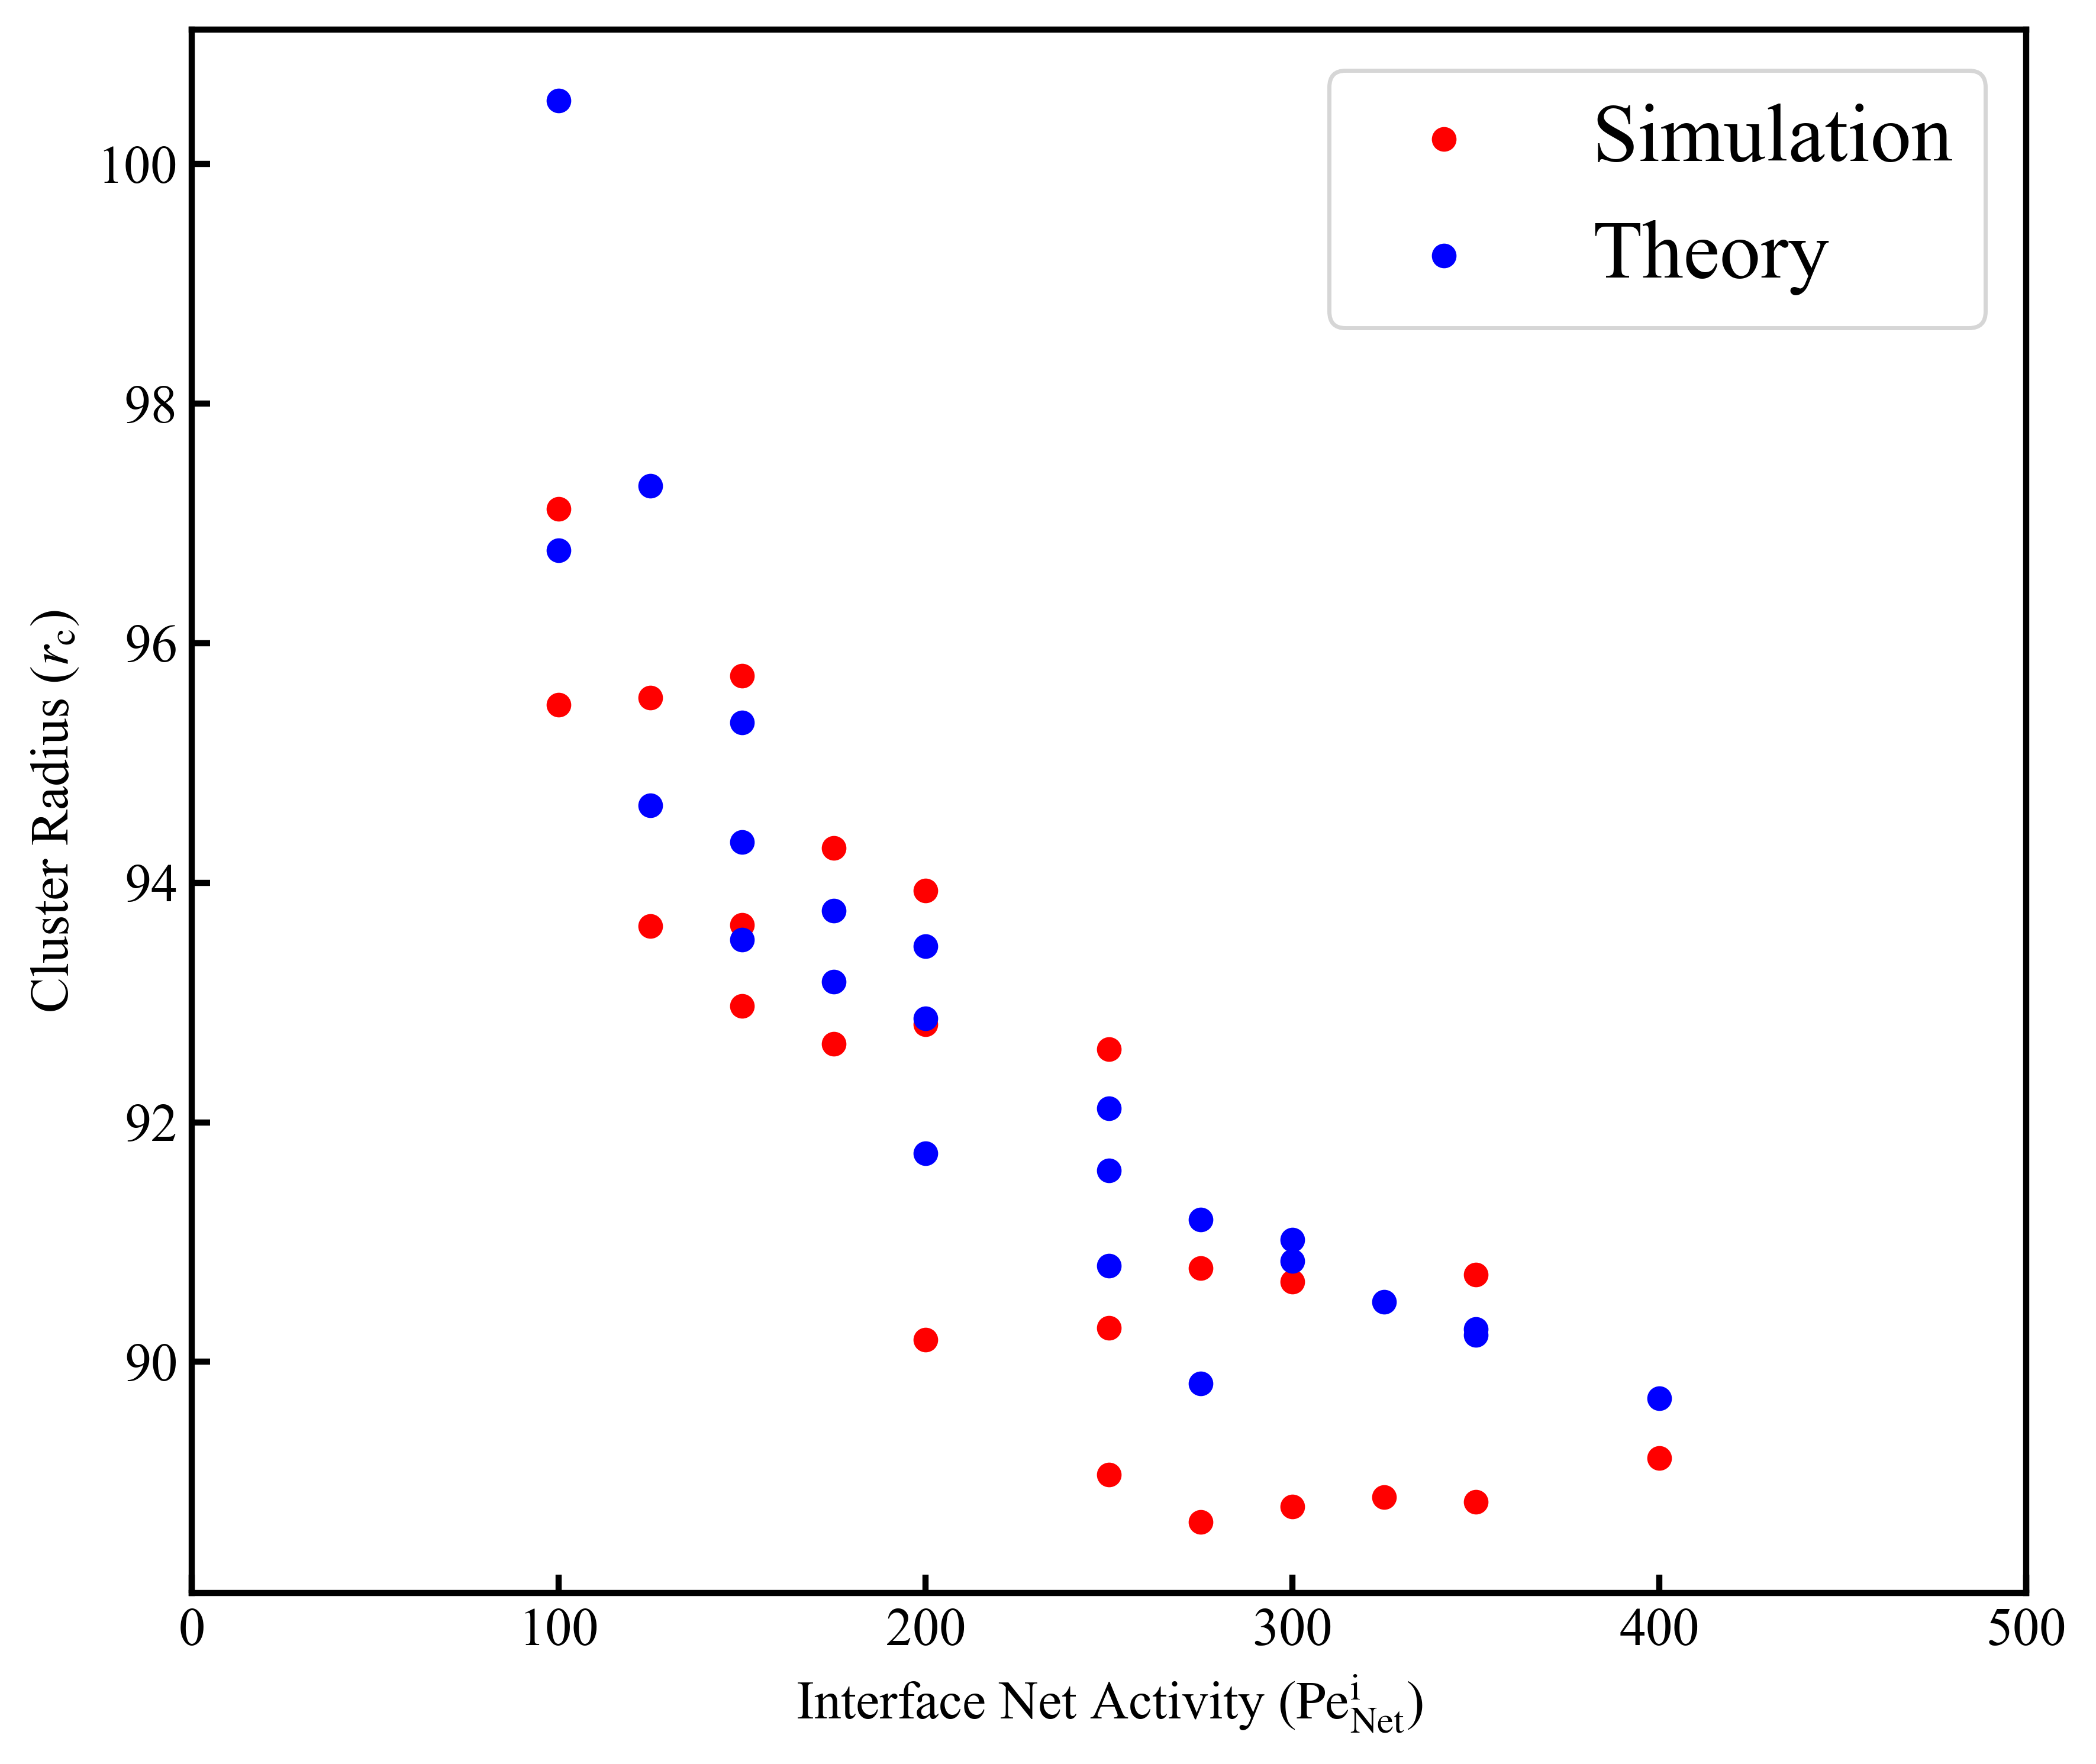

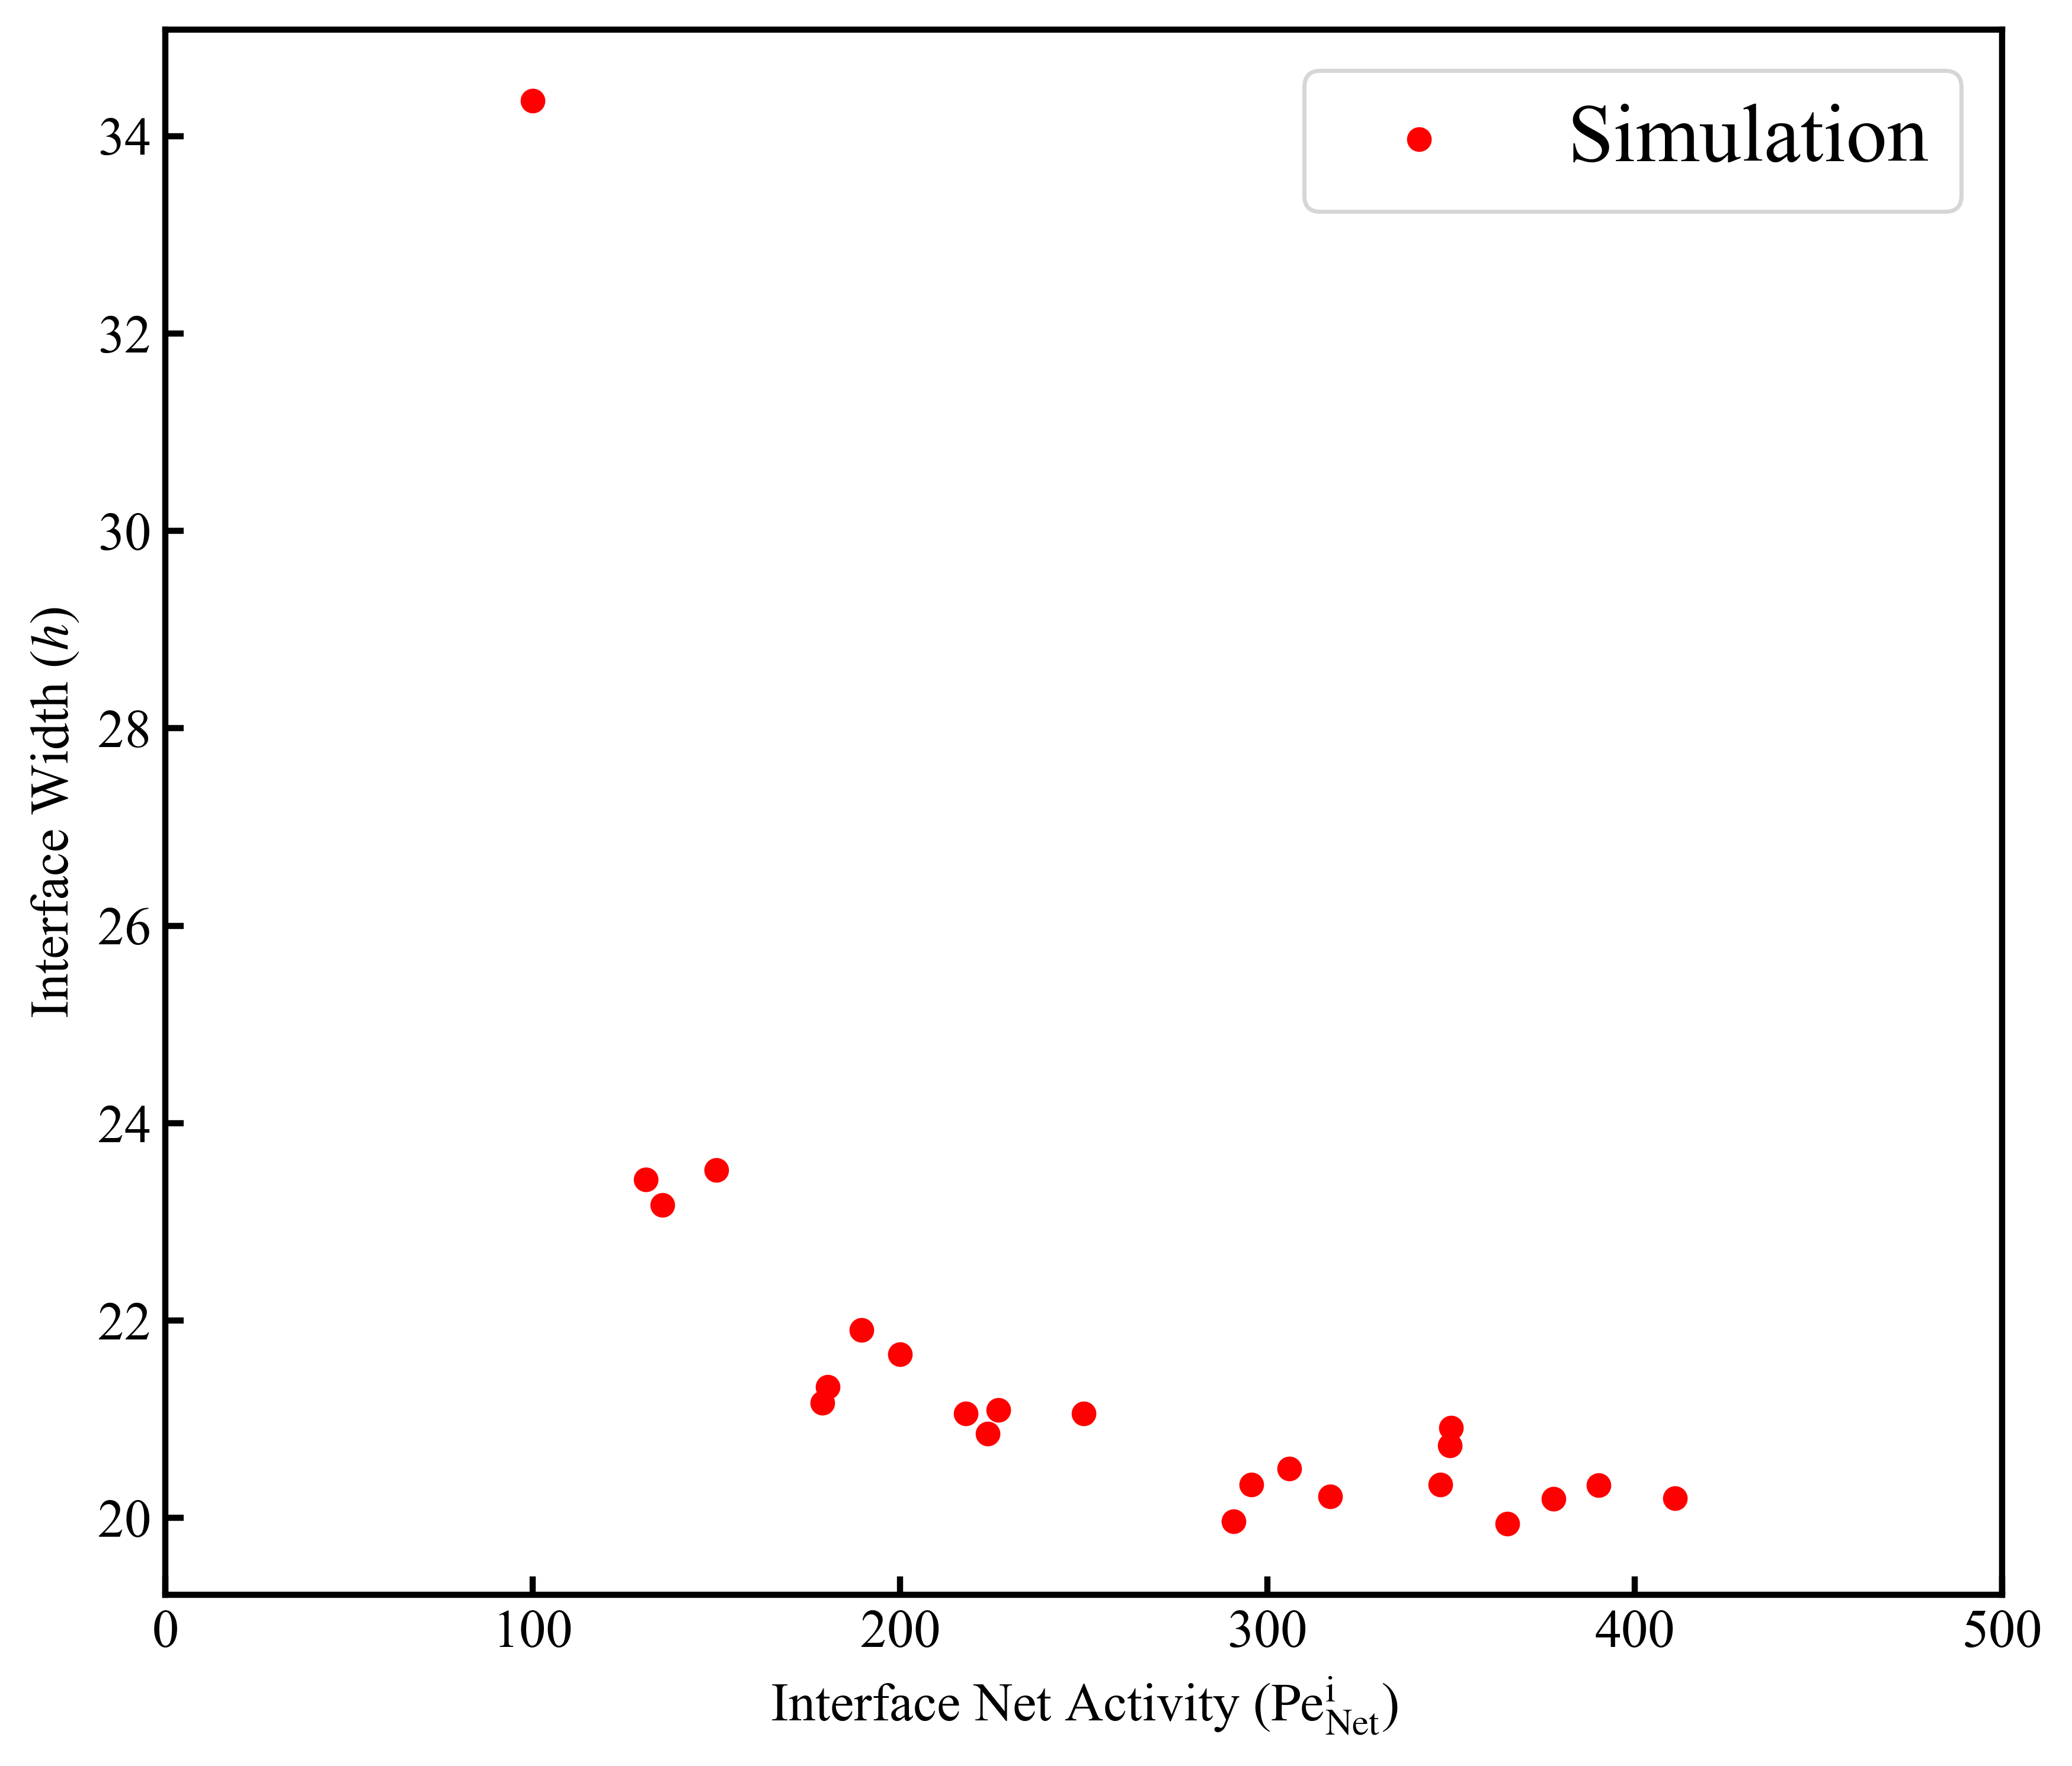

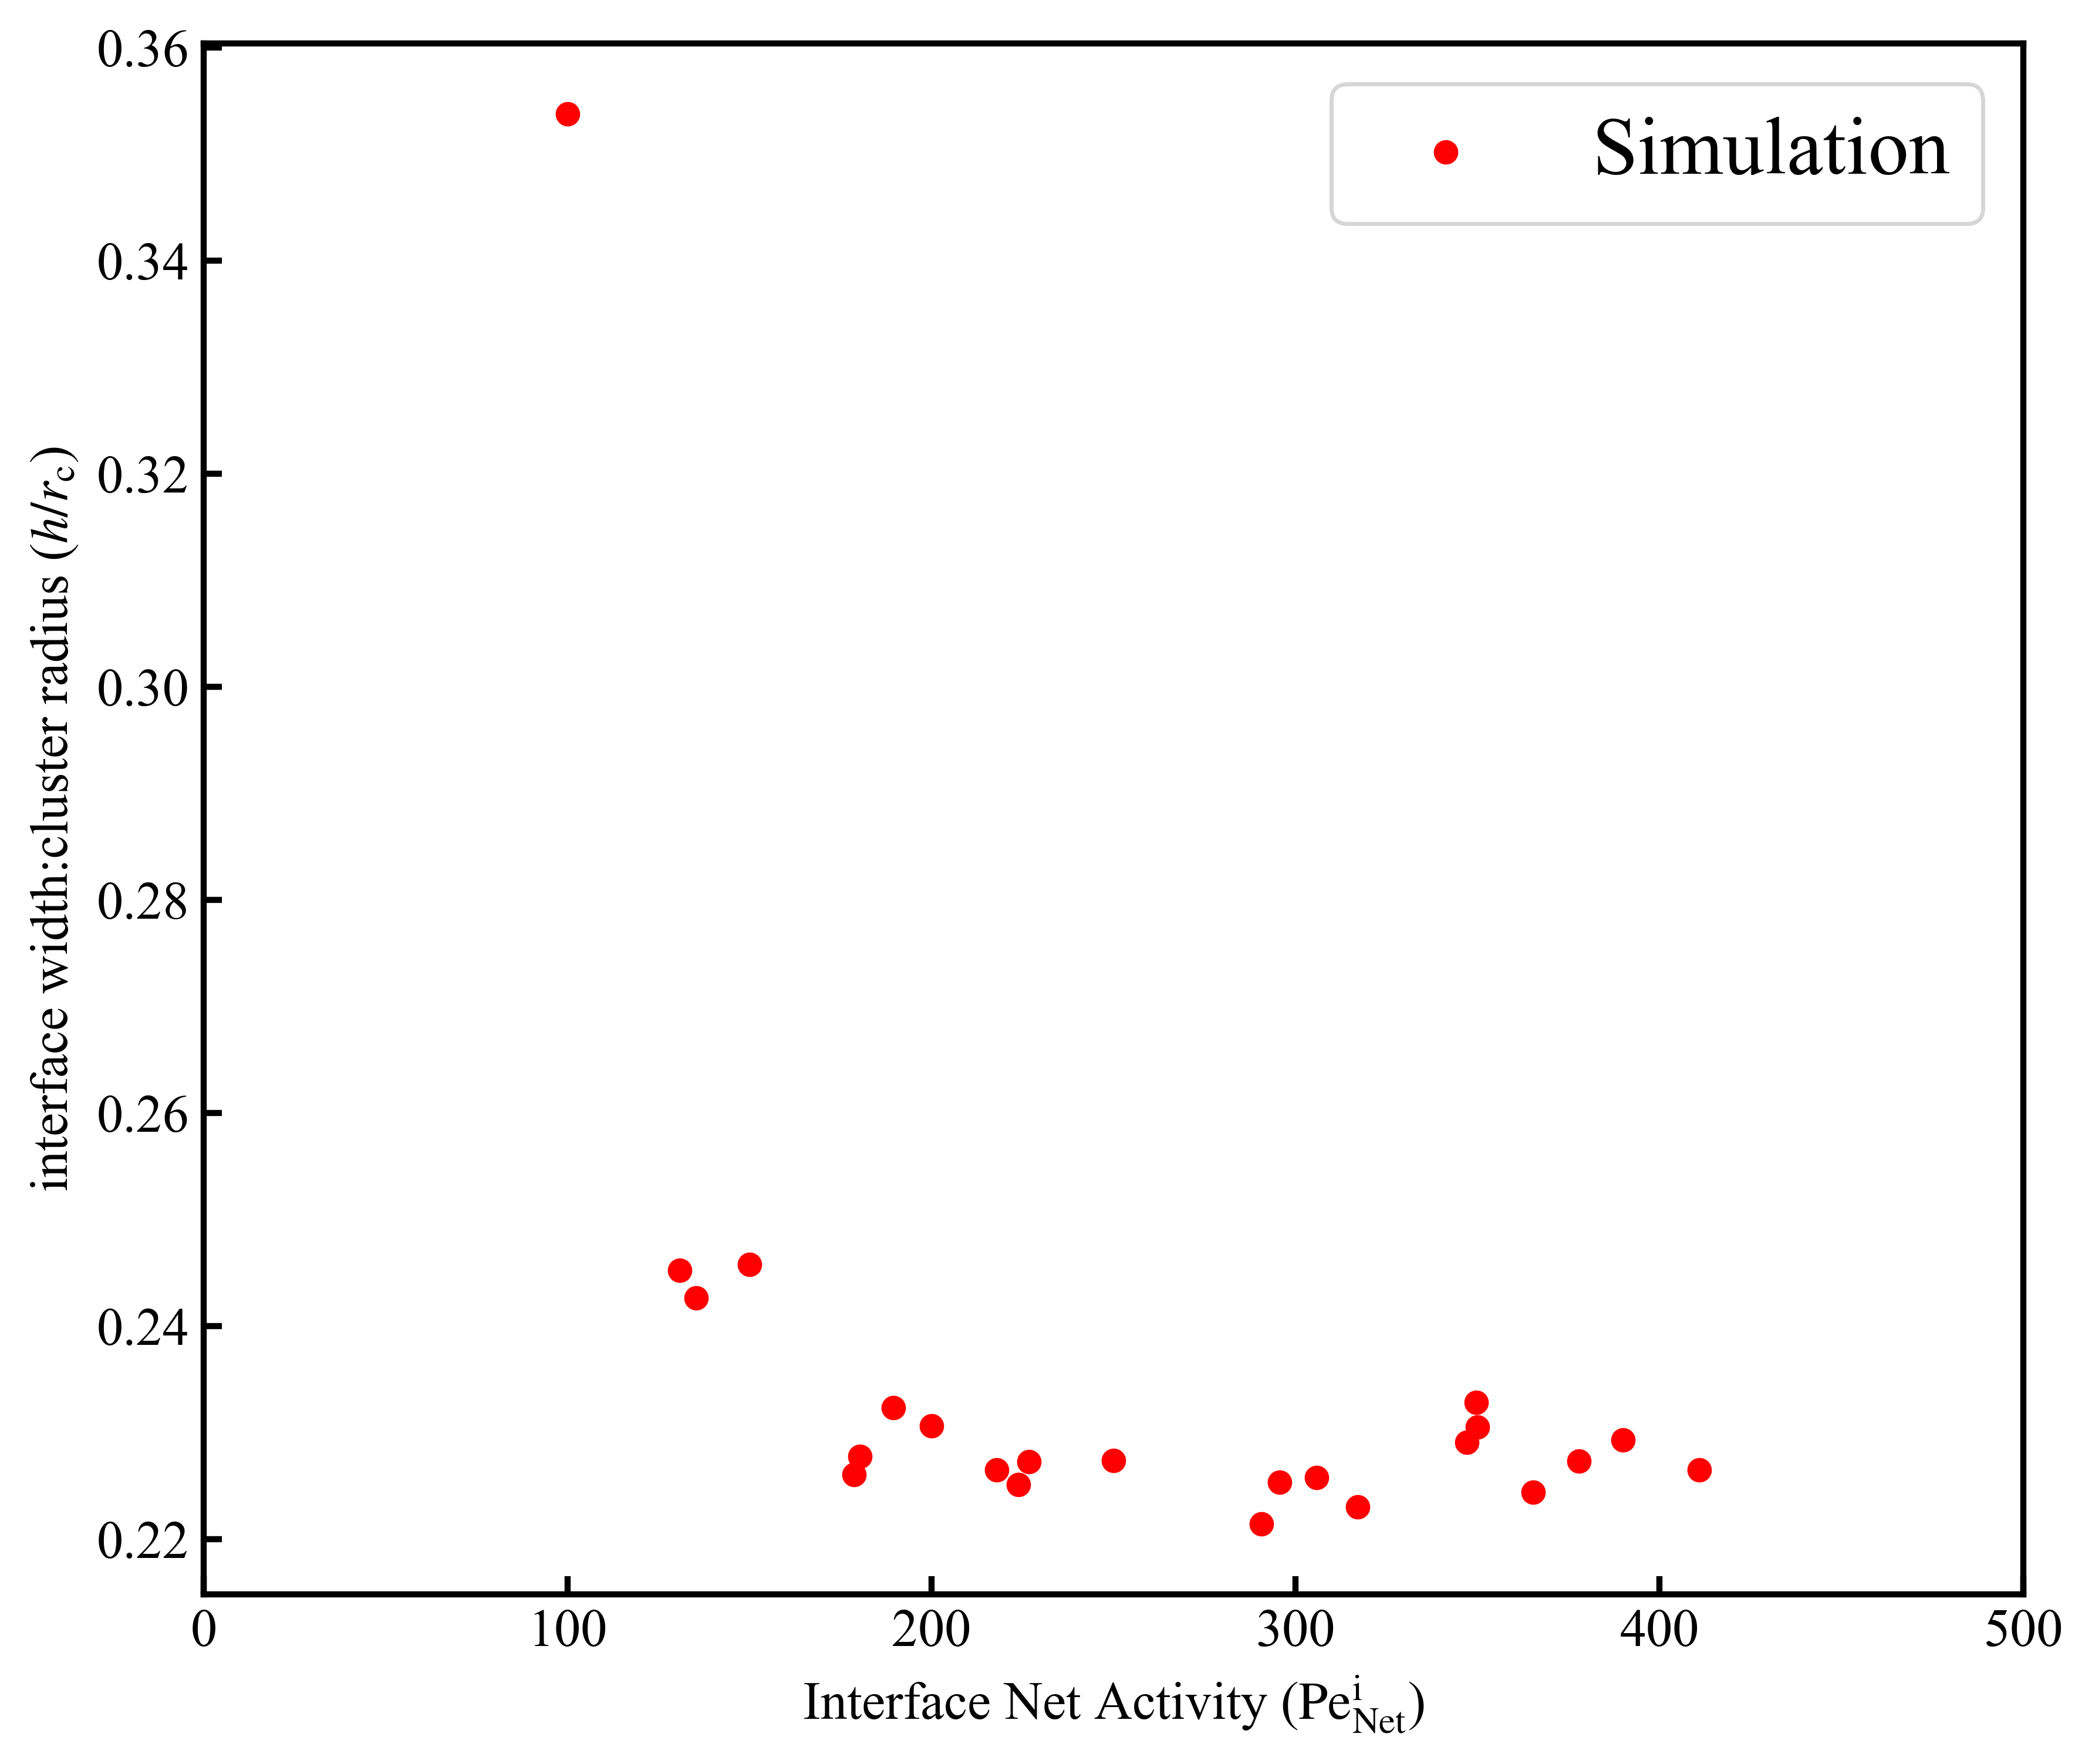

In [70]:
fig, ax1 = plt.subplots(figsize=(8,7))
#plt.scatter(int_pe_net, avg_rad, color='red', s=25.0, label='Simulation')
#plt.scatter(int_pe_net, rad_theory, color='blue', s=25.0, label='Theory')
plt.scatter(interpart_peNet, avg_rad, color='red', s=25.0, label='Simulation')
plt.scatter(interpart_peNet, rad_theory, color='blue', s=25.0, label='Theory')

ax1.set_xlim([0.0,500.0])
plt.ylabel(r'Cluster Radius ($r_\mathrm{c}$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
plt.scatter(int_pe_net, avg_width, color='red', s=25.0, label='Simulation')
#plt.scatter(int_pe_net, rad_theory, color='blue', s=25.0, label='Theory')

ax1.set_xlim([0.0,500.0])
plt.ylabel(r'Interface Width ($h$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

fig, ax1 = plt.subplots(figsize=(8,7))
plt.scatter(int_pe_net, avg_width/avg_rad, color='red', s=25.0, label='Simulation')
#plt.scatter(int_pe_net, rad_theory, color='blue', s=25.0, label='Theory')

ax1.set_xlim([0.0,500.0])
plt.ylabel(r'interface width:cluster radius ($h/r_\mathrm{c}$)')
plt.xlabel(r'Interface Net Activity ($\mathrm{Pe}_\mathrm{Net}^\mathrm{i}$)')
plt.legend(loc = 'upper right')

plt.show()

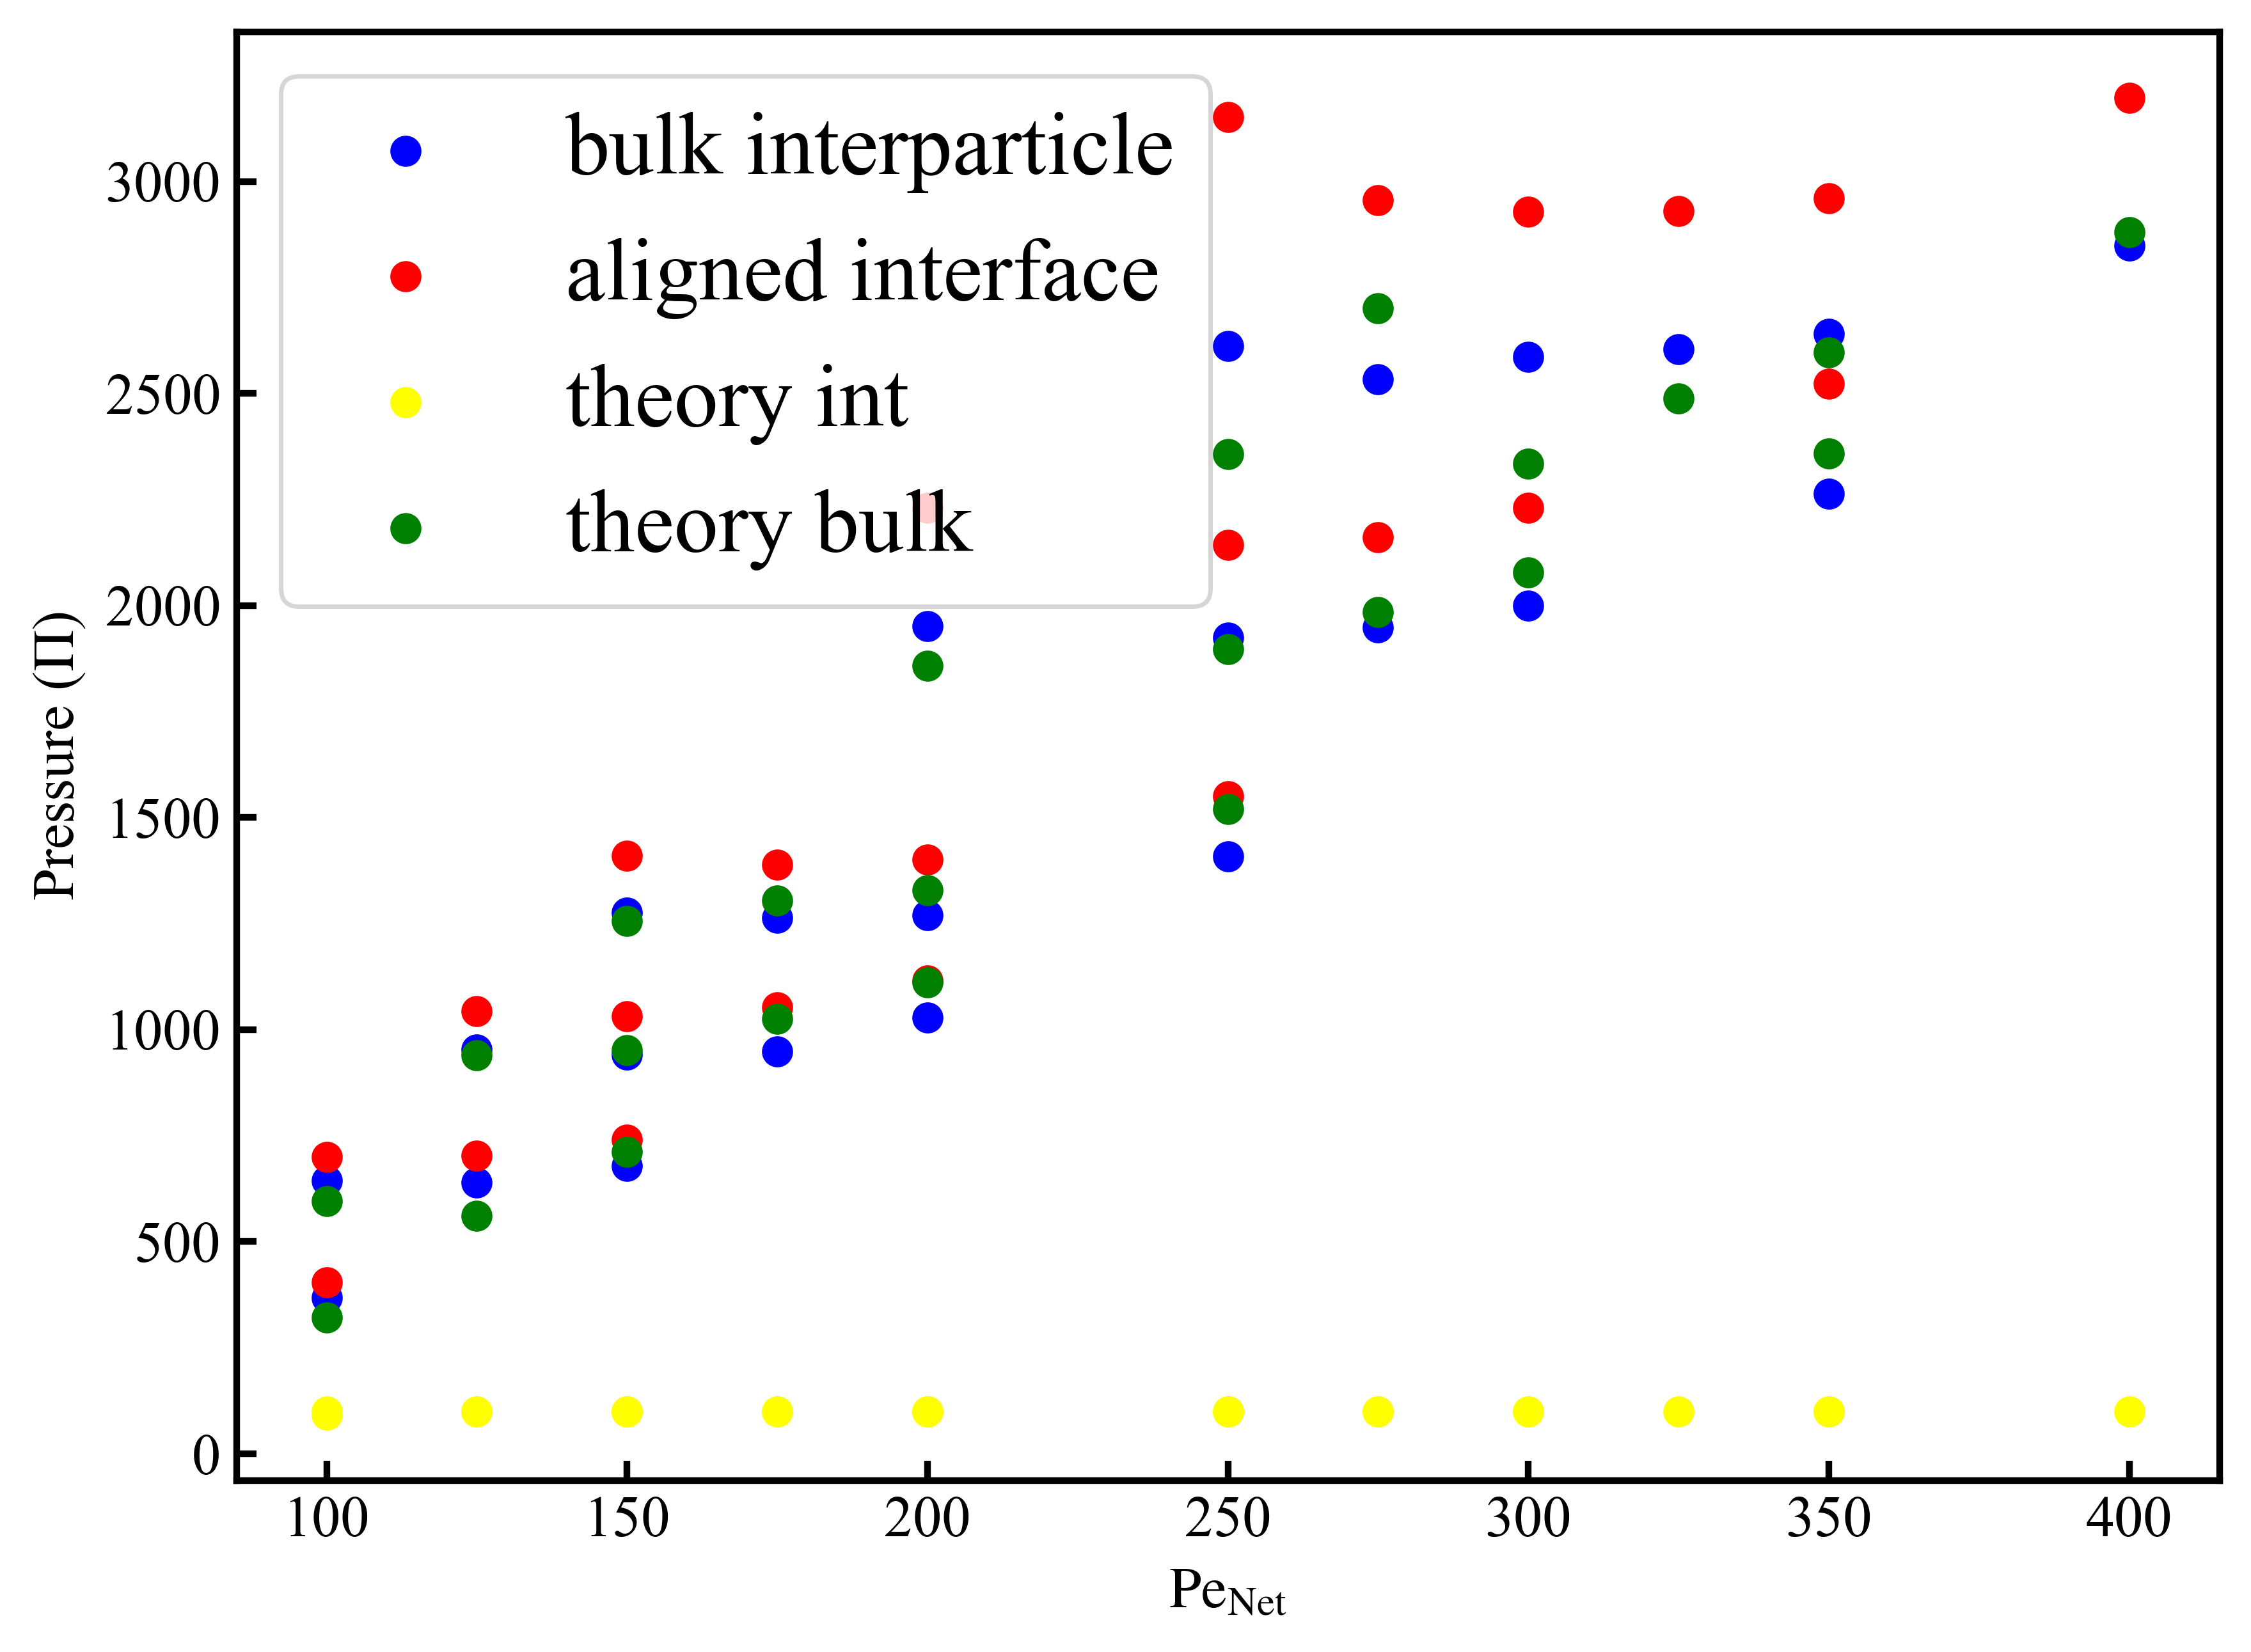

In [72]:
plt.figure(figsize=(8,6))
plt.scatter(interpart_peNet, interpart_press, c='blue', label='bulk interparticle')
plt.scatter(align_peNet, align_press_arr, c='red', label='aligned interface')
plt.scatter(interpart_peNet, avg_int_theory_arr, c='yellow', label='theory int')
plt.scatter(interpart_peNet, avg_bulk_theory_arr, c='green', label='theory bulk')
plt.ylabel(r'Pressure ($\Pi$)')
plt.xlabel(r'$\mathrm{Pe}_\mathrm{Net}$')
plt.legend()
plt.show()
